In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# Exploratory data analysis

In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
train.describe(include=['int64']).T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00 

In [6]:
train.describe(include=['float64']).T

count         mean         std     min     25%     50%     75%  \
LotFrontage  1201.0    70.049958   24.284752    21.0    59.0    69.0    80.0   
MasVnrArea   1452.0   103.685262  181.066207     0.0     0.0     0.0   166.0   
GarageYrBlt  1379.0  1978.506164   24.689725  1900.0  1961.0  1980.0  2002.0   

                max  
LotFrontage   313.0  
MasVnrArea   1600.0  
GarageYrBlt  2010.0

In [7]:
train.describe(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [8]:
avg_stroke = train["SalePrice"].astype("float").mean(axis = 0)
print("Averge of Sale Price:", avg_stroke)

Averge of Sale Price: 180921.19589041095


In [9]:
train["SalePrice"].replace(np.nan, avg_stroke, inplace = True)
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Probability Plot 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


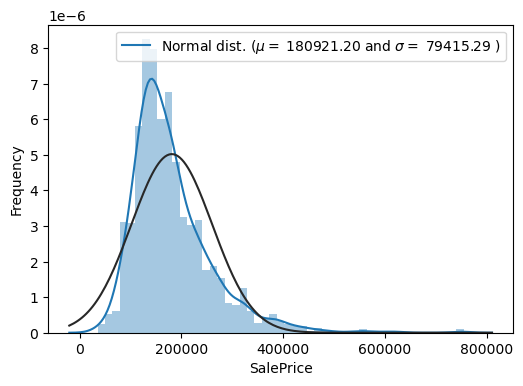

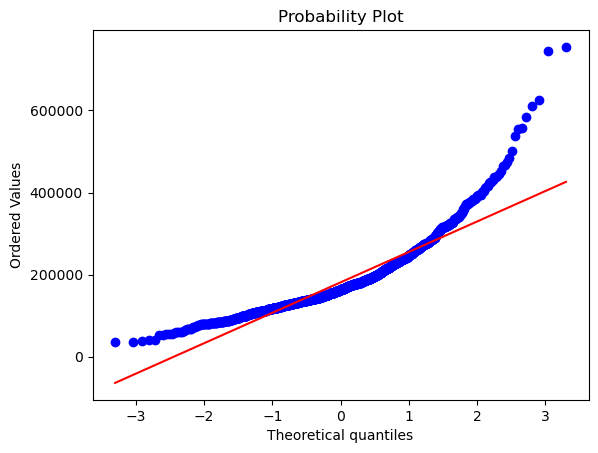

In [10]:
plt.subplots(figsize=(6,4))
sns.distplot(train['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


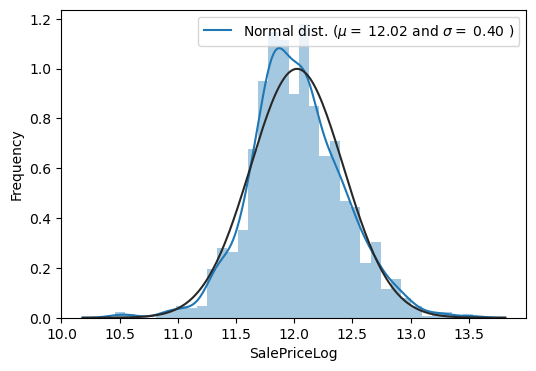

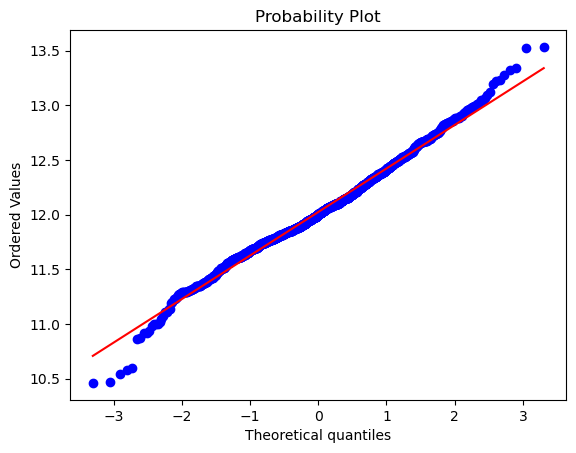

In [11]:
train['SalePriceLog'] = np.log1p(train['SalePrice'])

plt.subplots(figsize=(6,4))
sns.distplot(train['SalePriceLog'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePriceLog'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
stats.probplot(train['SalePriceLog'], plot=plt)
plt.show()

In [12]:
del train['SalePriceLog']

In [13]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

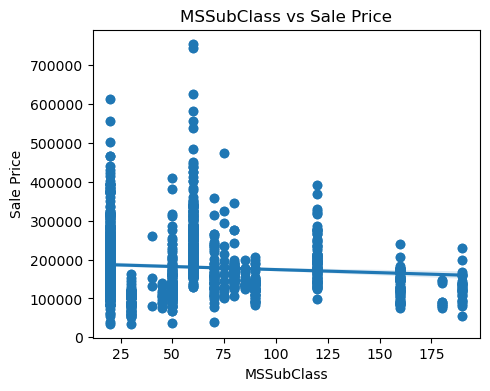

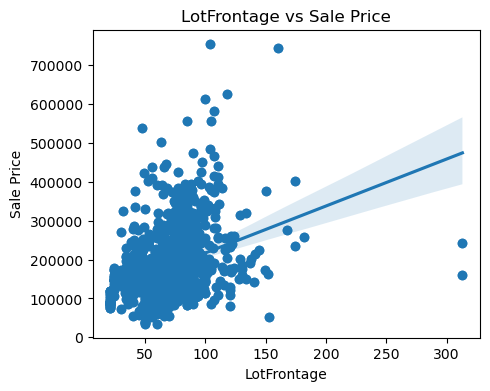

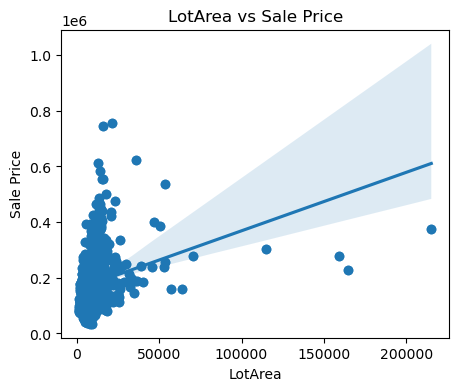

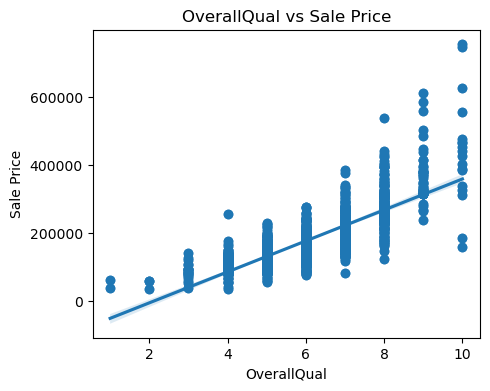

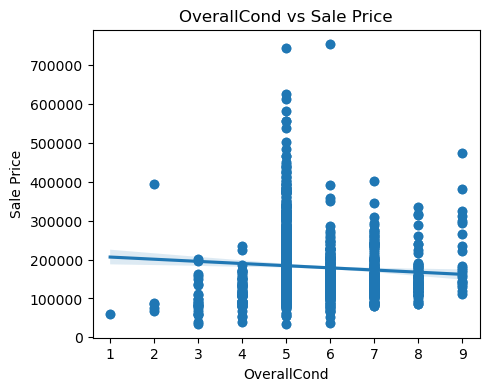

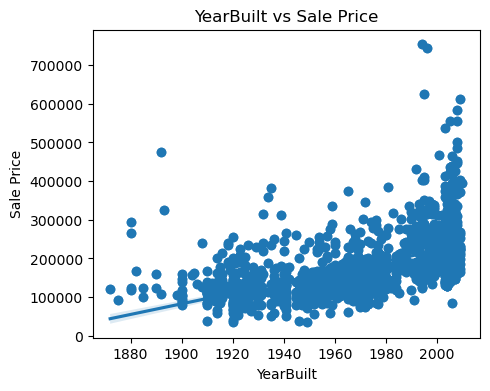

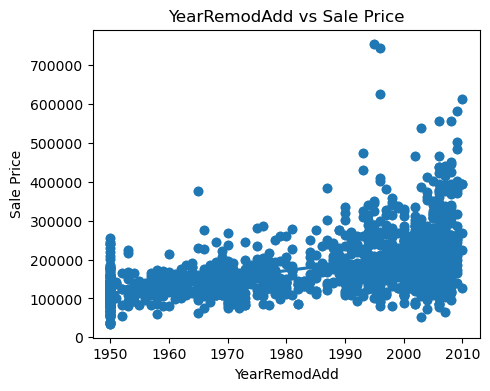

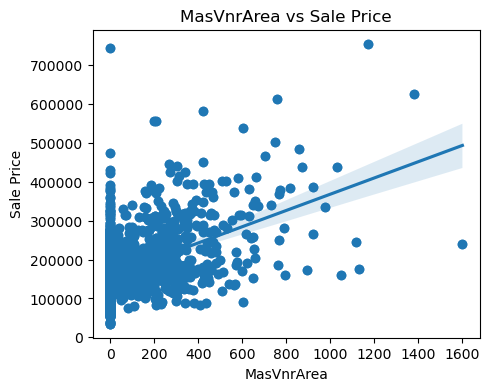

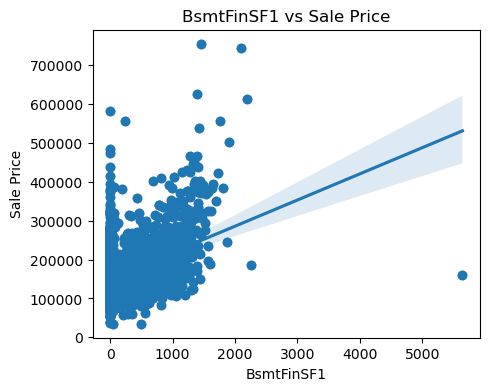

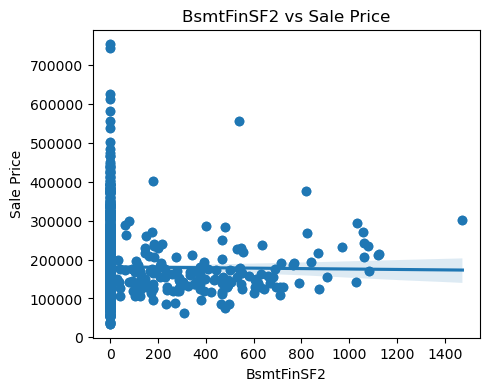

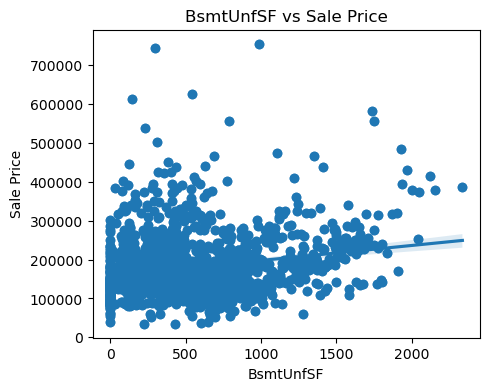

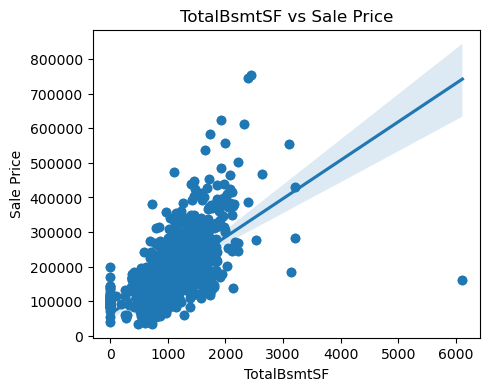

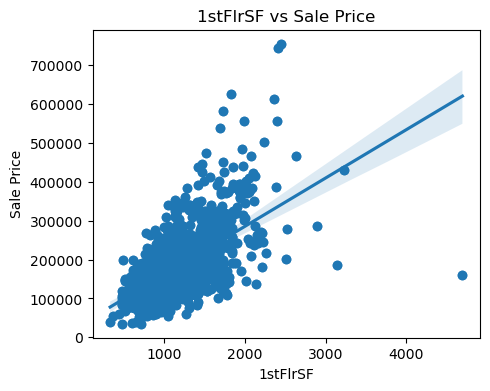

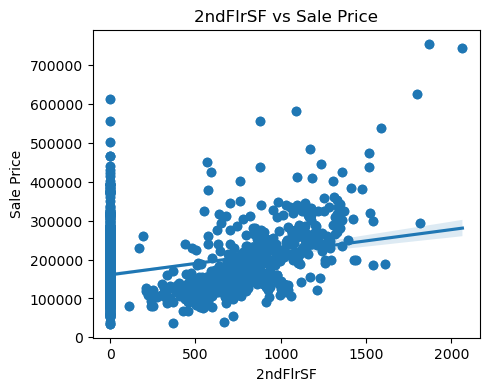

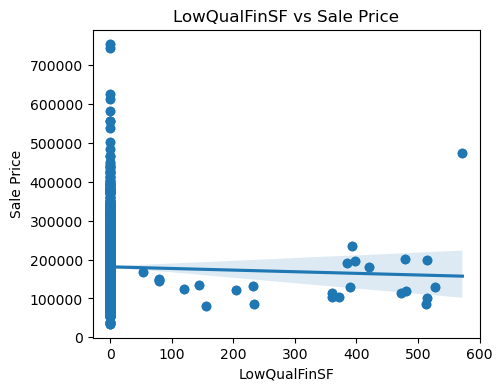

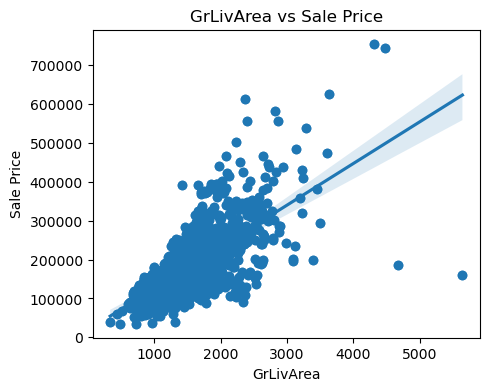

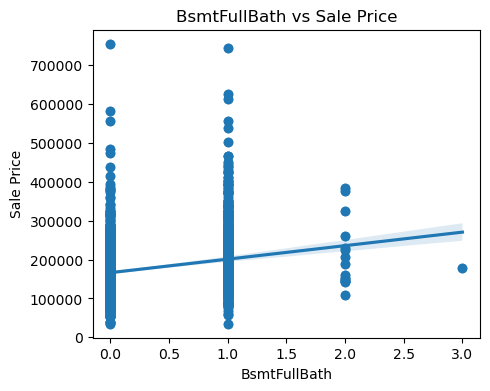

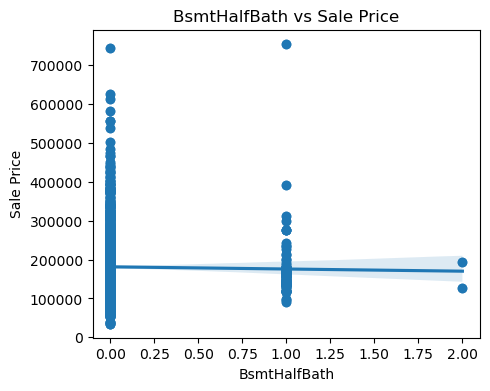

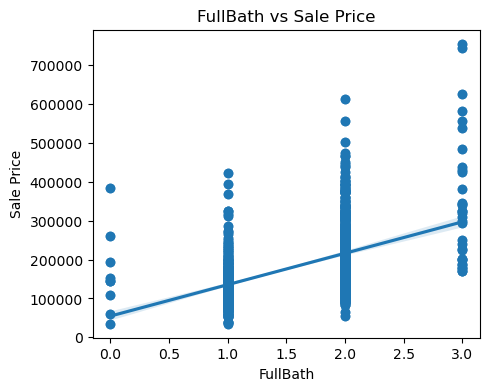

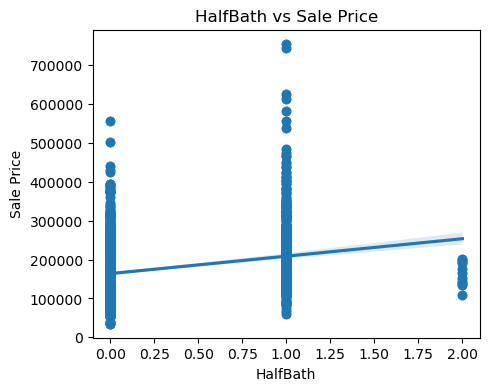

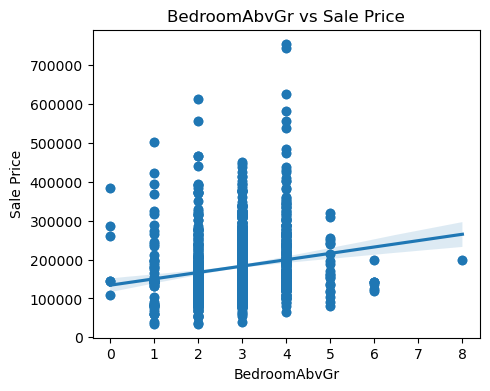

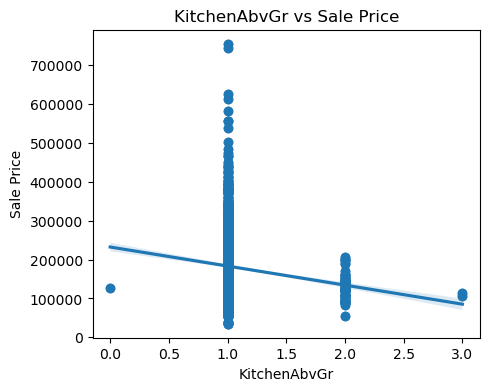

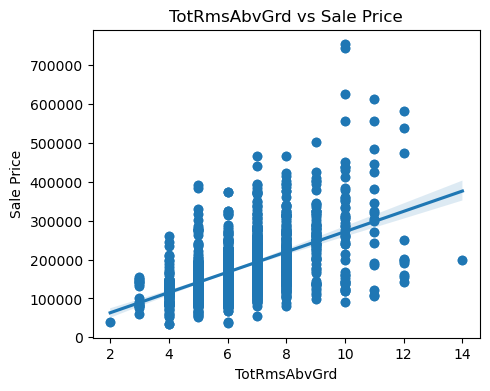

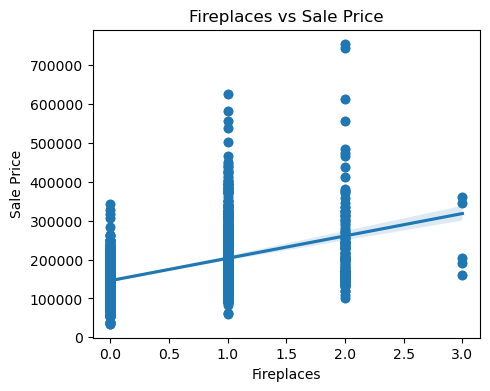

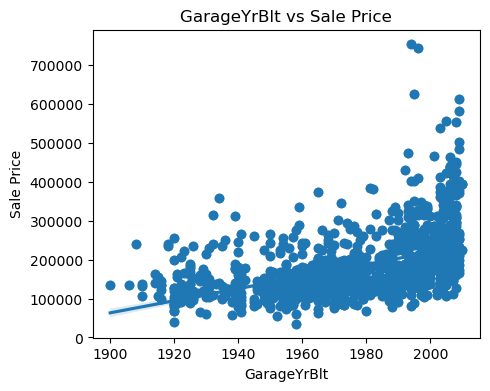

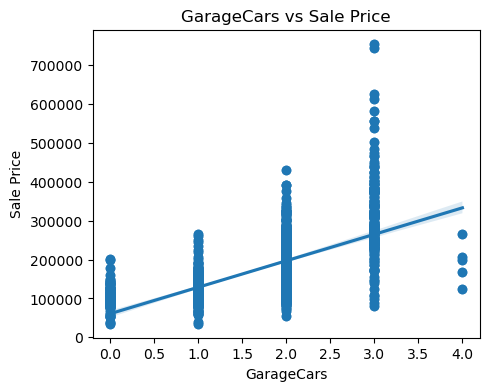

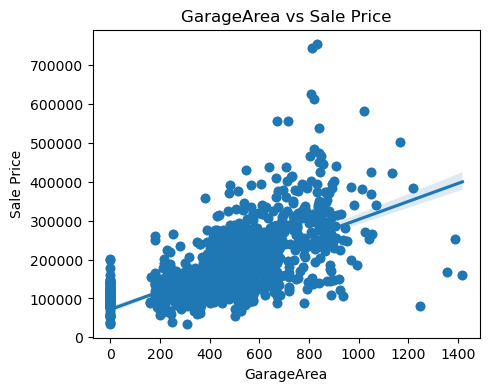

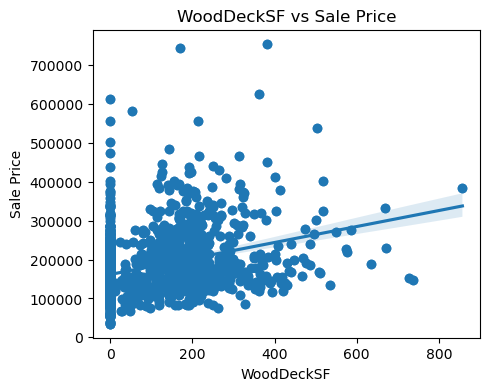

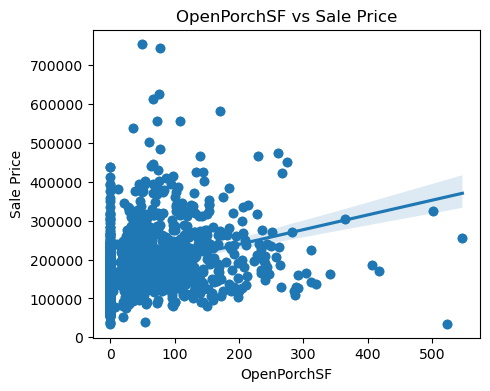

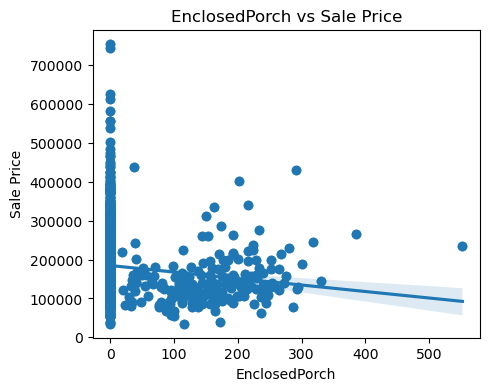

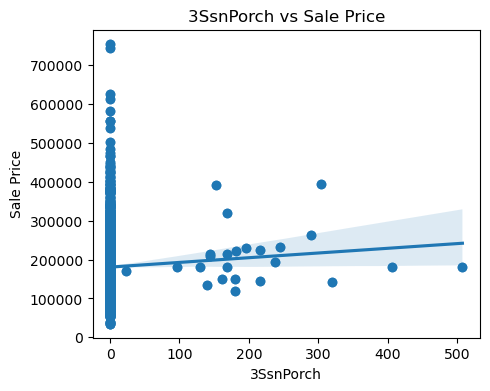

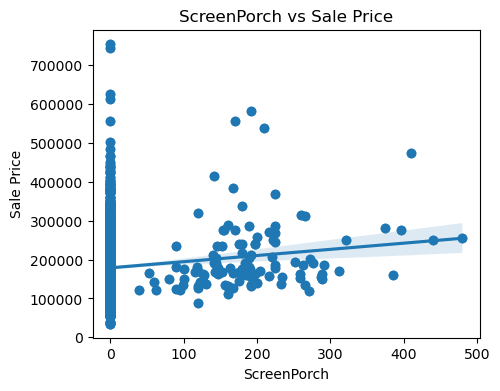

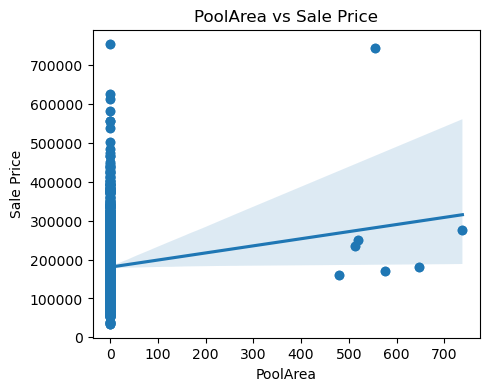

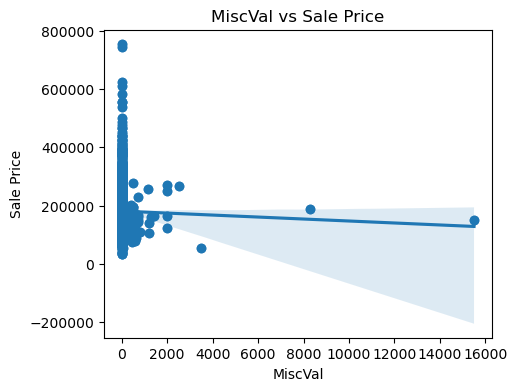

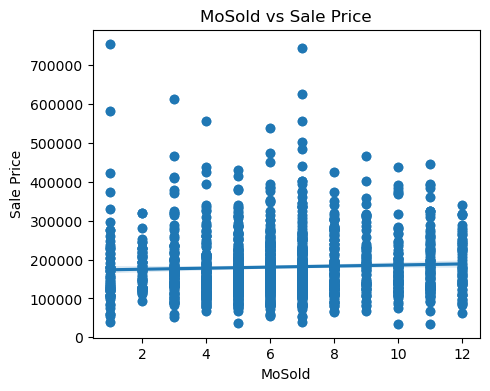

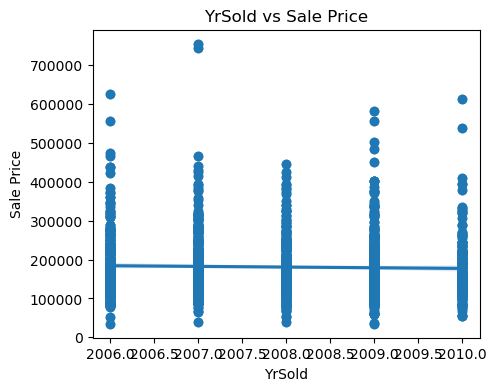

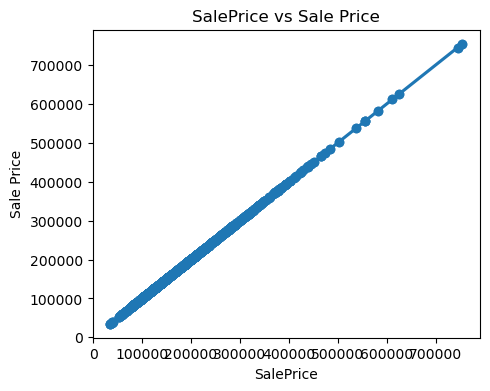

In [14]:
# Exclude ID column 
numeric_features = numeric_features.drop('Id', axis=1)

# Loop through each feature 
for col in numeric_features:
    plt.figure(figsize=(5,4))
    plt.scatter(train[col], train['SalePrice'])
    
    sns.regplot(x=col, y='SalePrice', data=train)
    
    plt.title(col + ' vs Sale Price')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    
    plt.show() 

# Explanatory data analysis

<BarContainer object of 1460 artists>

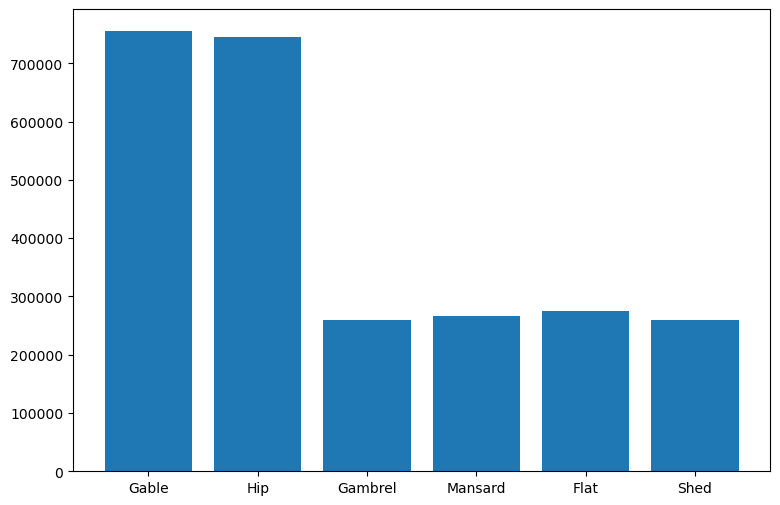

In [15]:
figure= plt.subplots(figsize=(9,6))
plt.bar(train['RoofStyle'], train['SalePrice'])

<BarContainer object of 1460 artists>

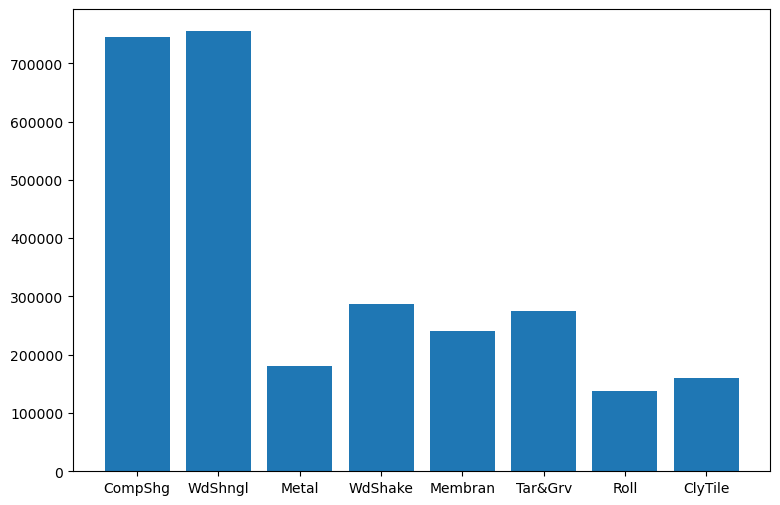

In [16]:
figure= plt.subplots(figsize=(9,6))
plt.bar(train['RoofMatl'], train['SalePrice'])


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

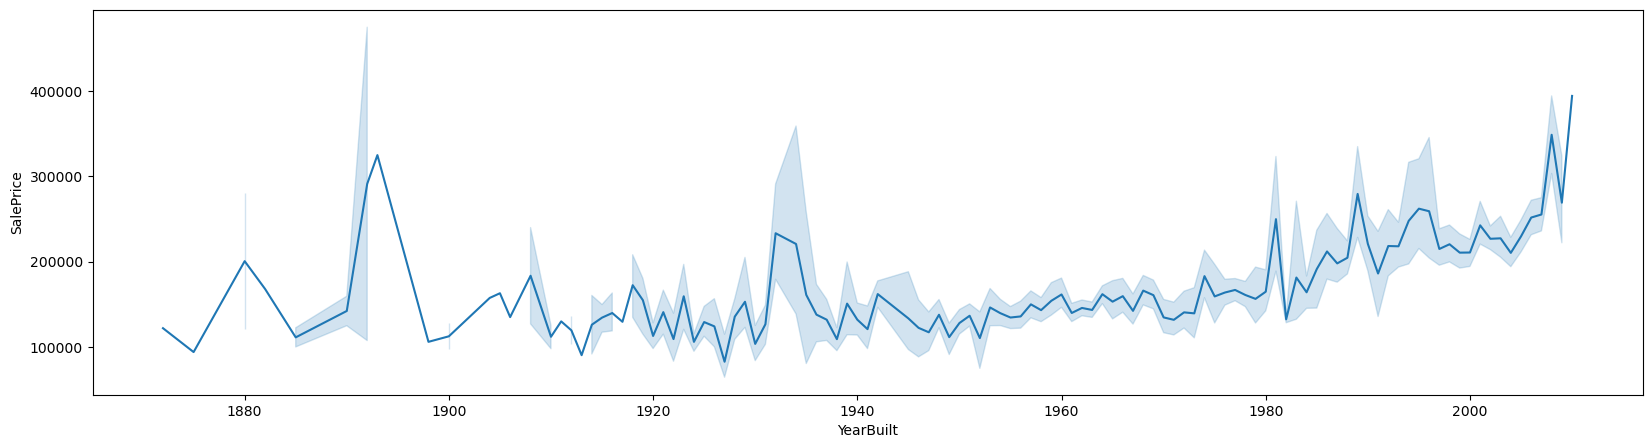

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train, x="YearBuilt", y="SalePrice")

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

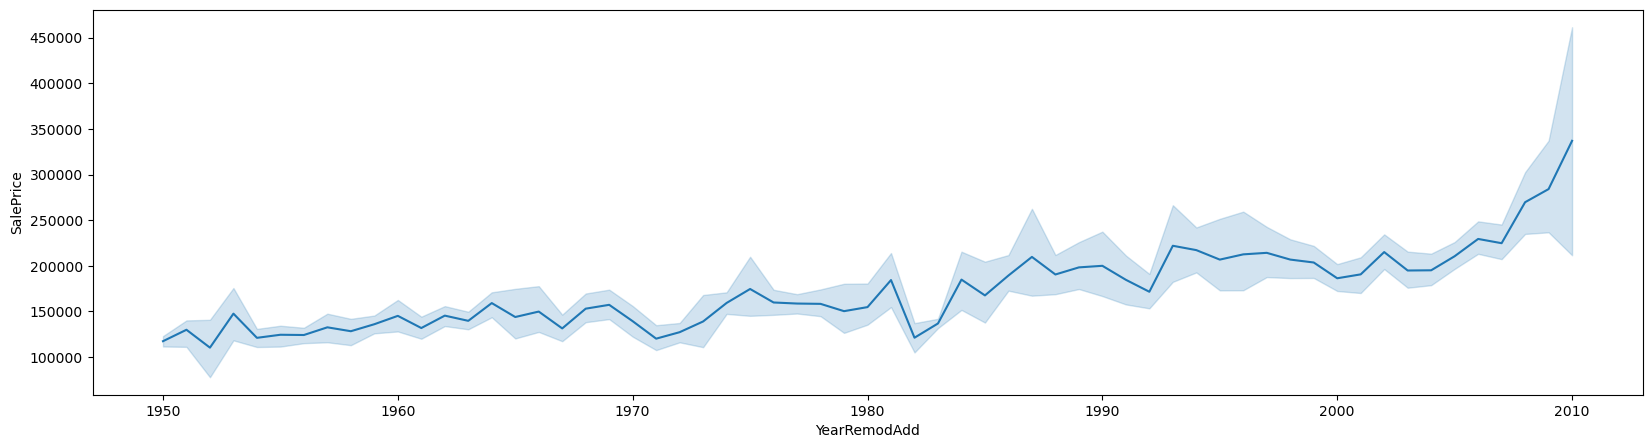

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train, x="YearRemodAdd", y="SalePrice")

<BarContainer object of 1460 artists>

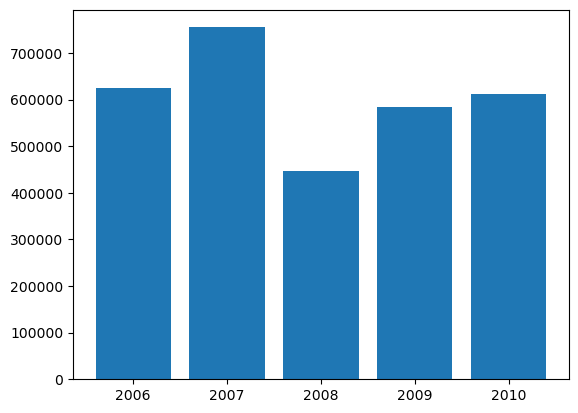

In [19]:
#sns.countplot(x='YrSold', data=train)

plt.bar(train['YrSold'], train['SalePrice'])


<BarContainer object of 1460 artists>

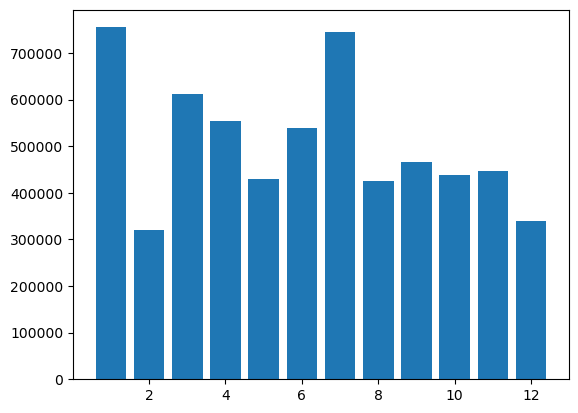

In [20]:
# sns.countplot(x='MoSold', data=train)

plt.bar(train['MoSold'], train['SalePrice'])

<BarContainer object of 1460 artists>

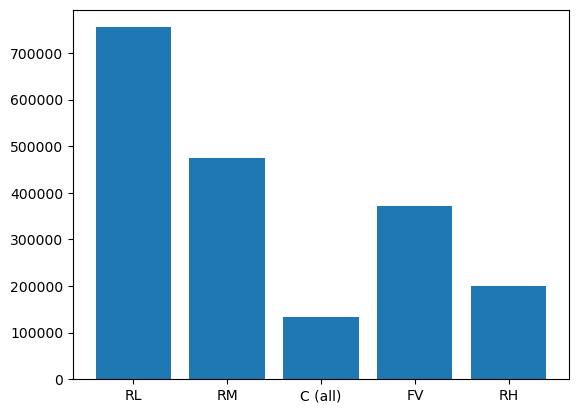

In [21]:
# sns.countplot(x='MSZoning', data=train)

plt.bar(train['MSZoning'], train['SalePrice'])

<AxesSubplot:ylabel='SaleCondition'>

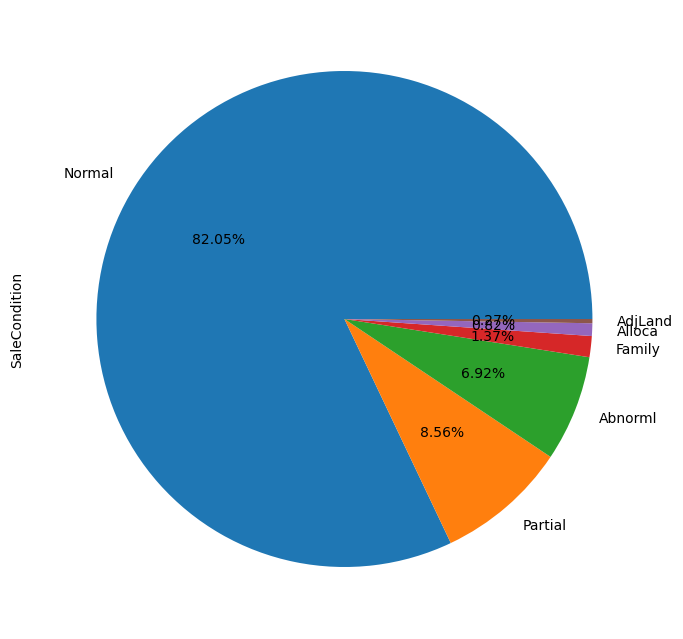

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
train['SaleCondition'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

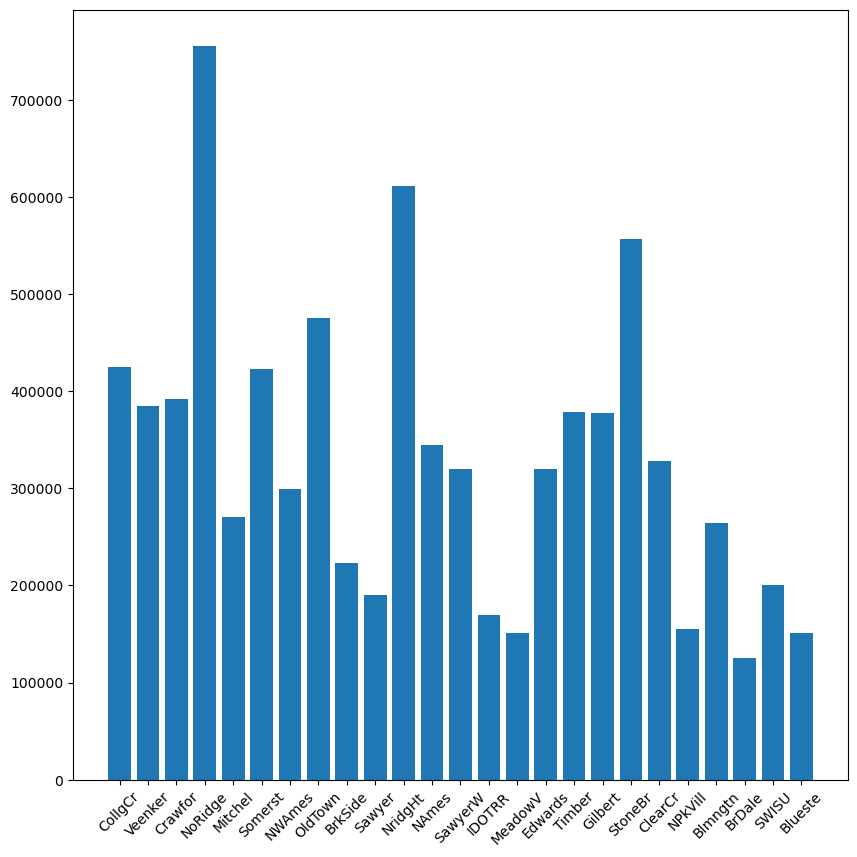

In [23]:
# sns.countplot(x='Neighborhood', data=train)

plt.figure(figsize=(10,10))
plt.bar(train['Neighborhood'], train['SalePrice'])
plt.xticks(rotation= 45)


# Missing values and Remove outliers

In [24]:
miss_col_train = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=True)
percent_miss_train = round((miss_col_train / len(train) * 100) , 2)
missing_train = pd.DataFrame([miss_col_train, percent_miss_train]).T.rename(columns={0:'Feature', 1:'missing'})
missing_train

Feature  missing
Electrical        1.0     0.07
MasVnrType        8.0     0.55
MasVnrArea        8.0     0.55
BsmtQual         37.0     2.53
BsmtCond         37.0     2.53
BsmtFinType1     37.0     2.53
BsmtExposure     38.0     2.60
BsmtFinType2     38.0     2.60
GarageCond       81.0     5.55
GarageQual       81.0     5.55
GarageFinish     81.0     5.55
GarageType       81.0     5.55
GarageYrBlt      81.0     5.55
LotFrontage     259.0    17.74
FireplaceQu     690.0    47.26
Fence          1179.0    80.75
Alley          1369.0    93.77
MiscFeature    1406.0    96.30
PoolQC         1453.0    99.52

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  
imputer.fit(train)
train.loc[:,:] = imputer.fit_transform(train) 

train = pd.DataFrame(train)

In [26]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4            Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1456         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1457         Lvl    AllPub  ...        0     Gd  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1459         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [27]:
# Replace infinite values with a large finite value or np.nan, and then handle the np.nan values as before

# train.fillna(value=0, inplace=True)
# train.replace([np.inf, -np.inf], np.nan, inplace=True)
# train.fillna(value=0, inplace=True)


## Remove outliers

In [28]:
cat_features = np.array([i for i in train.columns.tolist() if train[i].dtype == 'object'])
num_features = np.array([i for i in train.columns.tolist() if train[i].dtype != 'object'])


In [29]:
print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 38
Categorial features column = 43


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


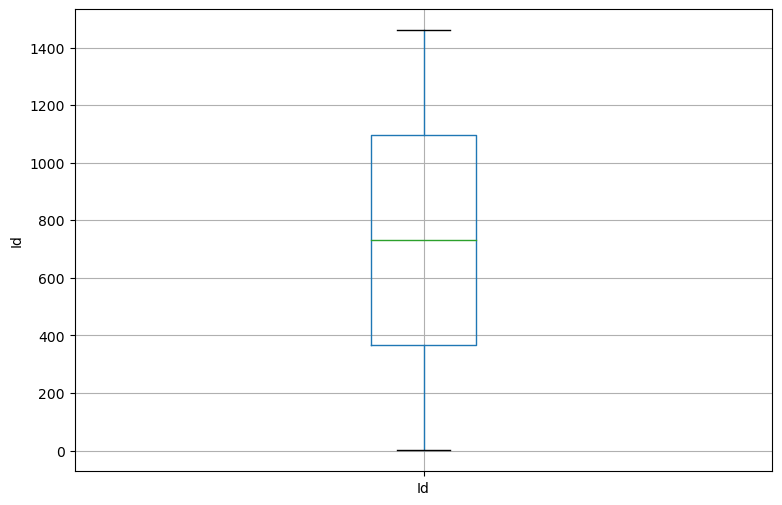

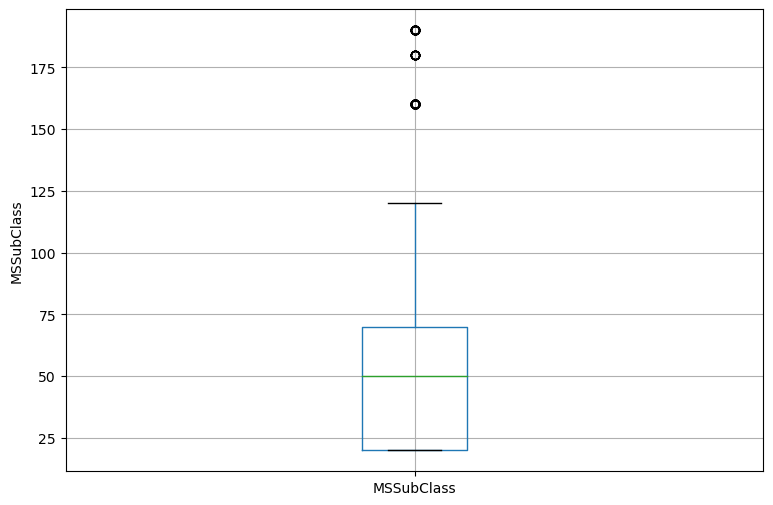

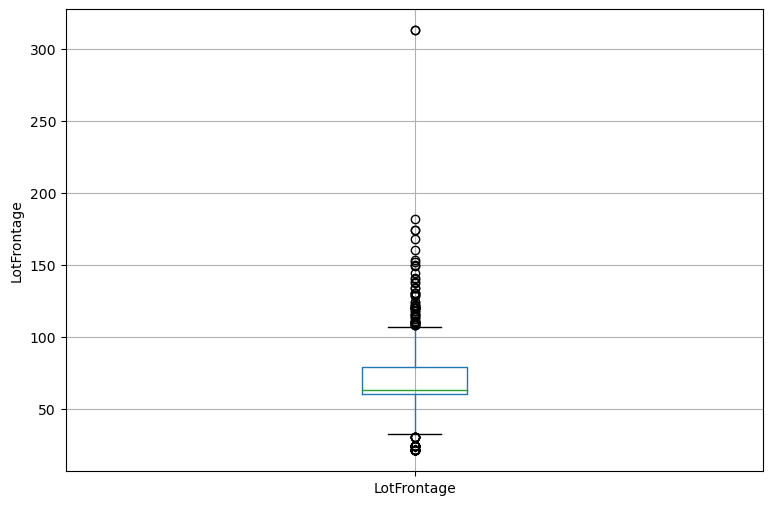

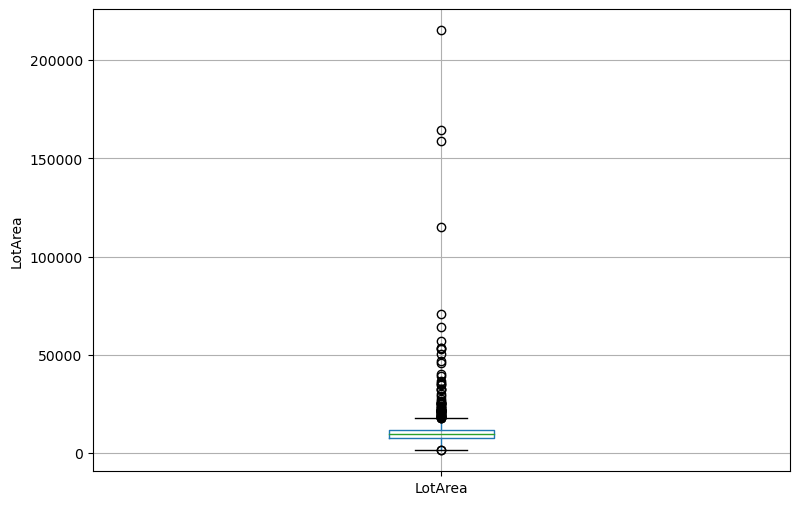

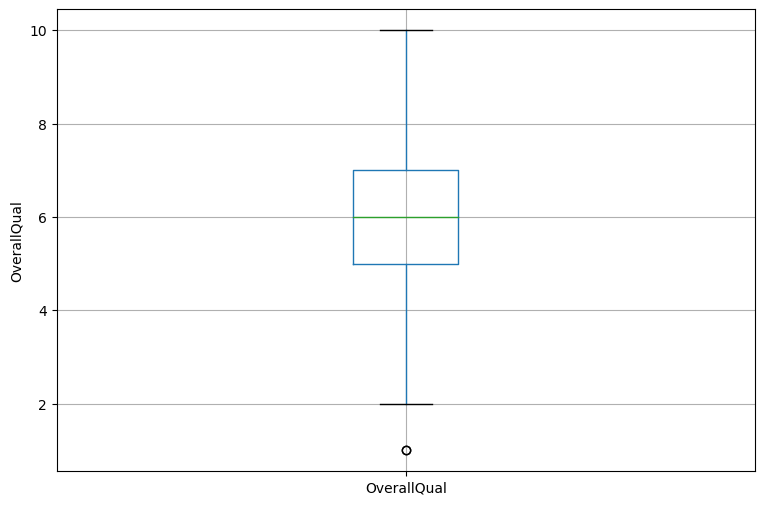

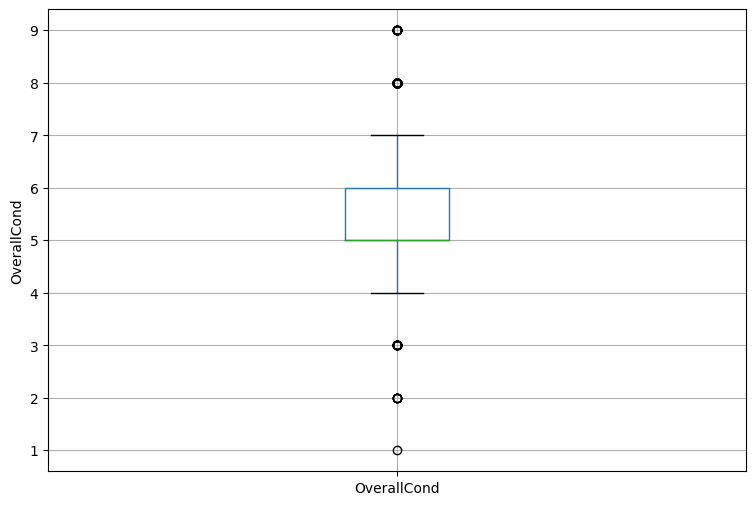

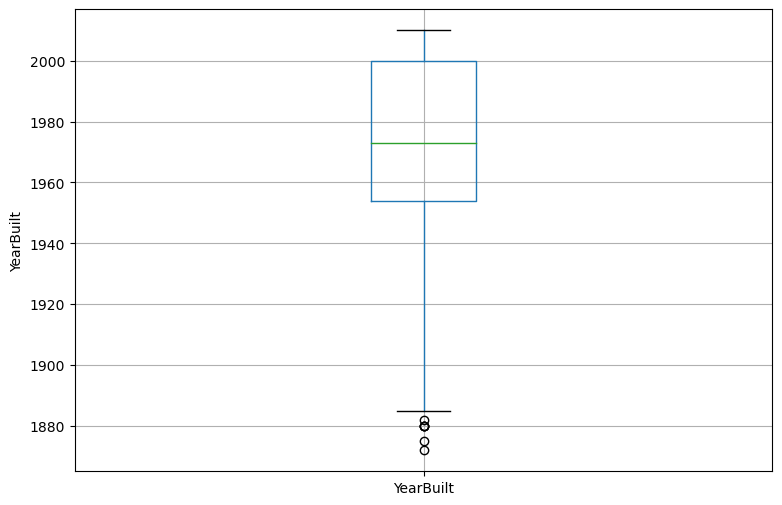

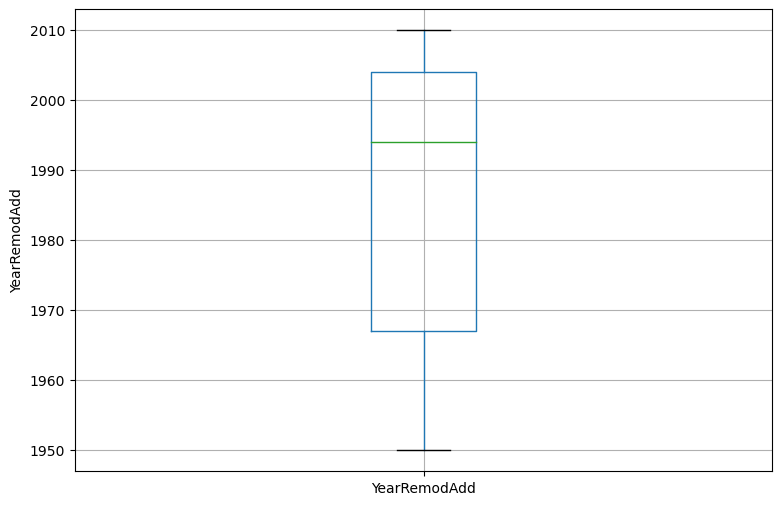

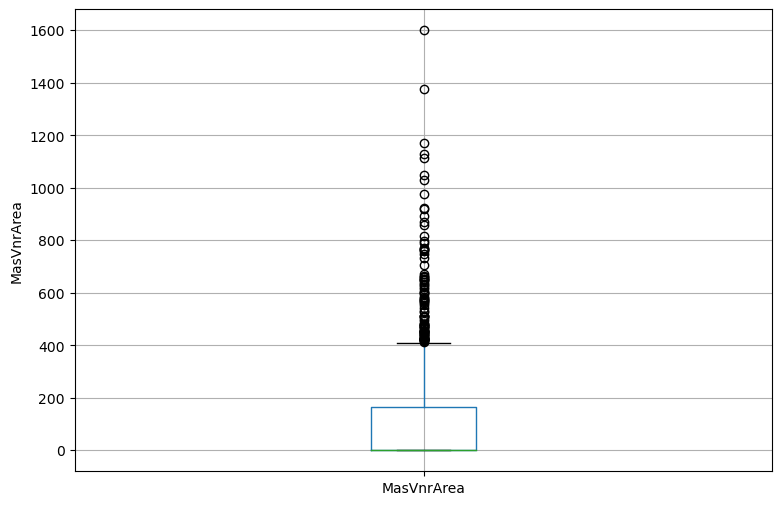

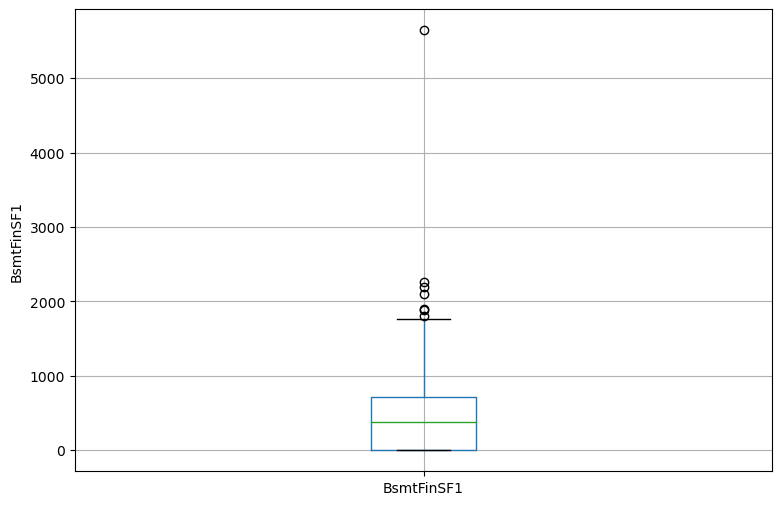

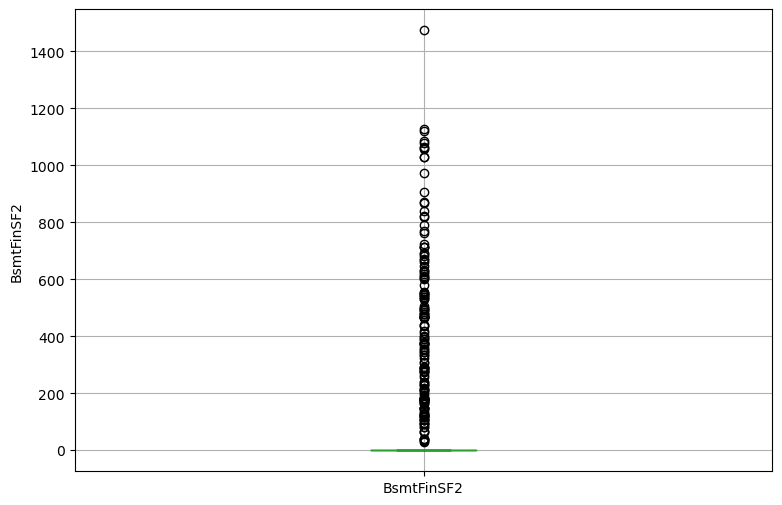

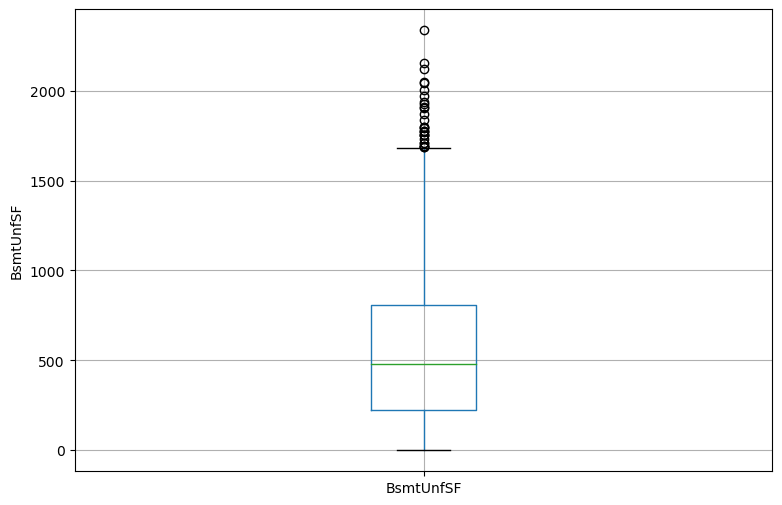

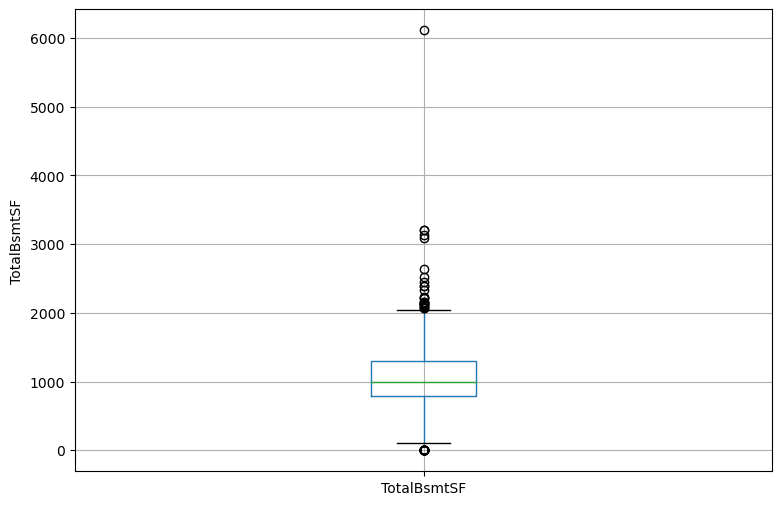

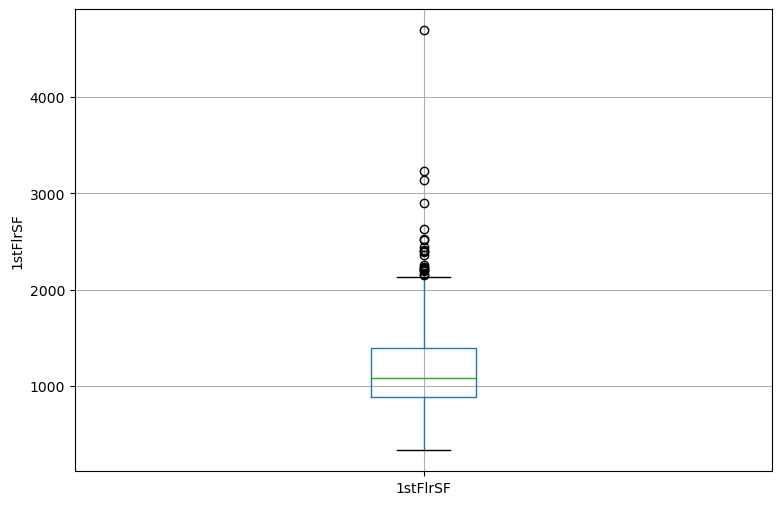

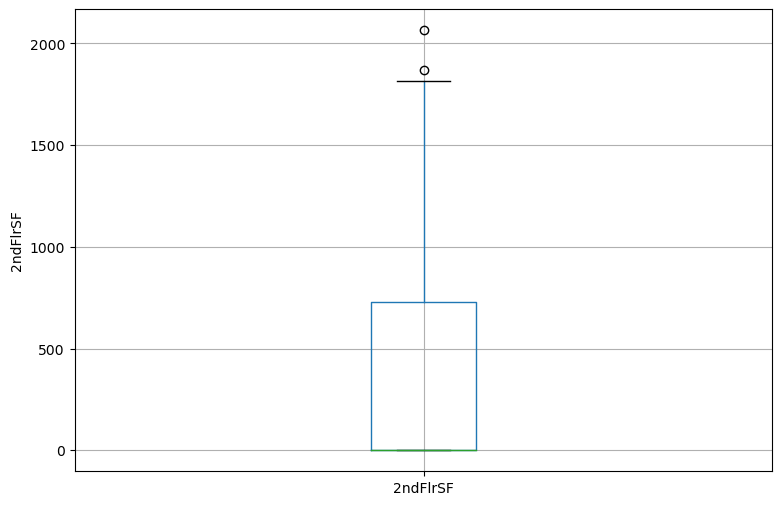

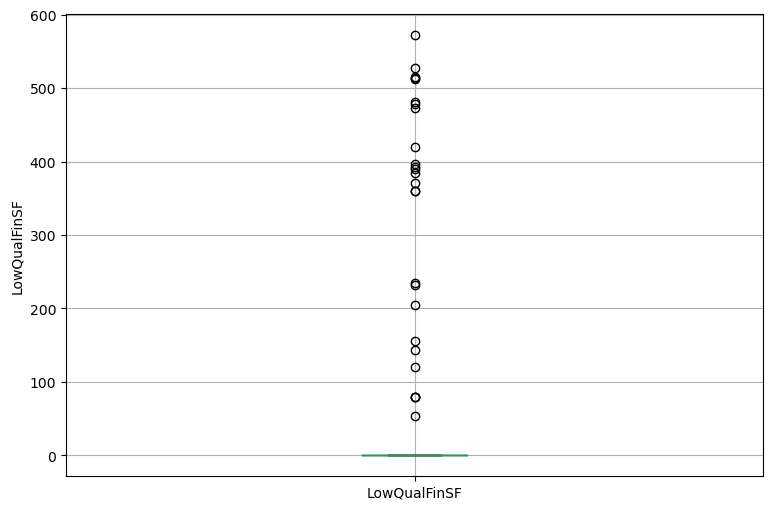

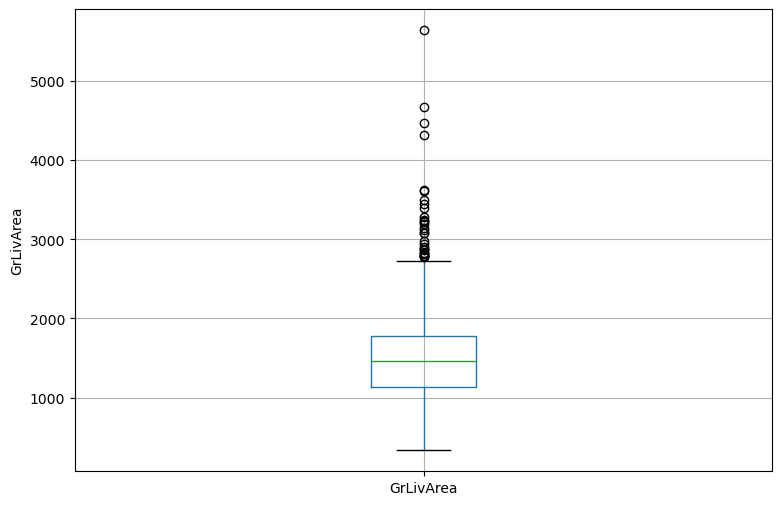

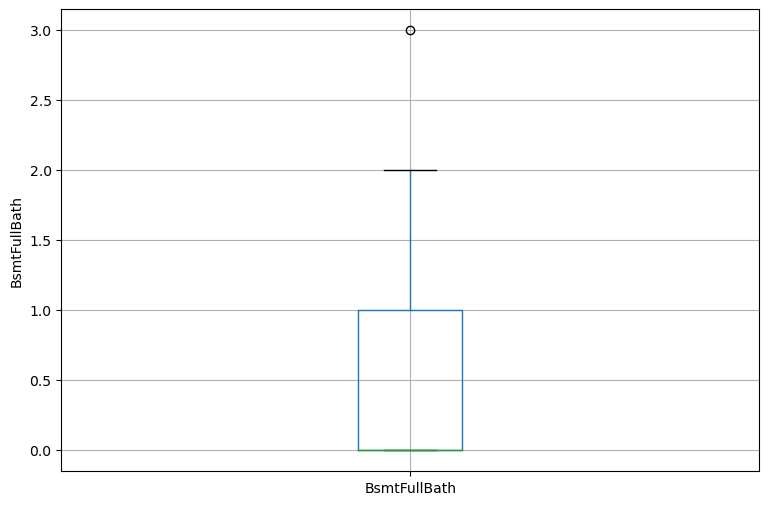

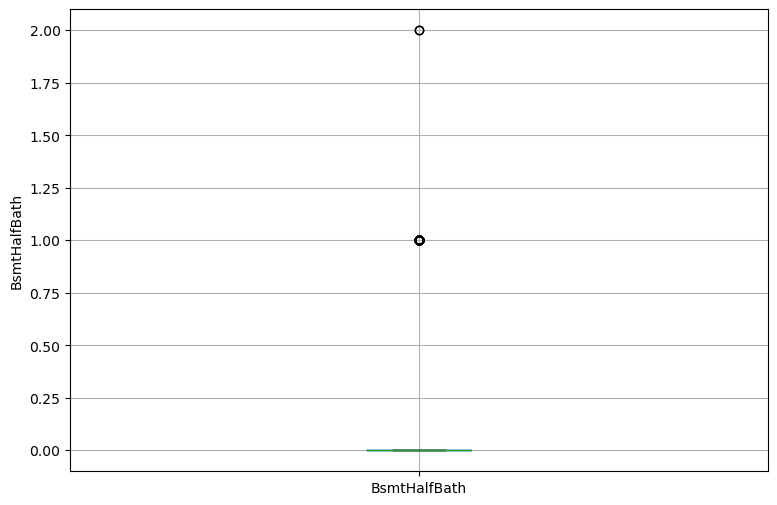

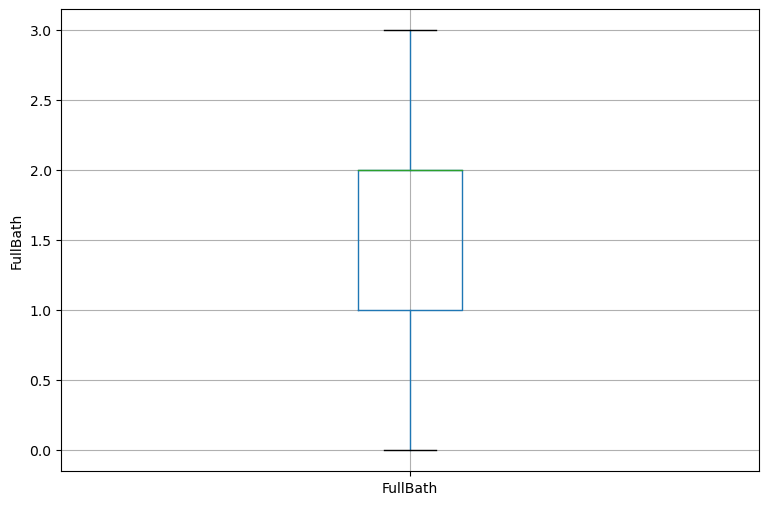

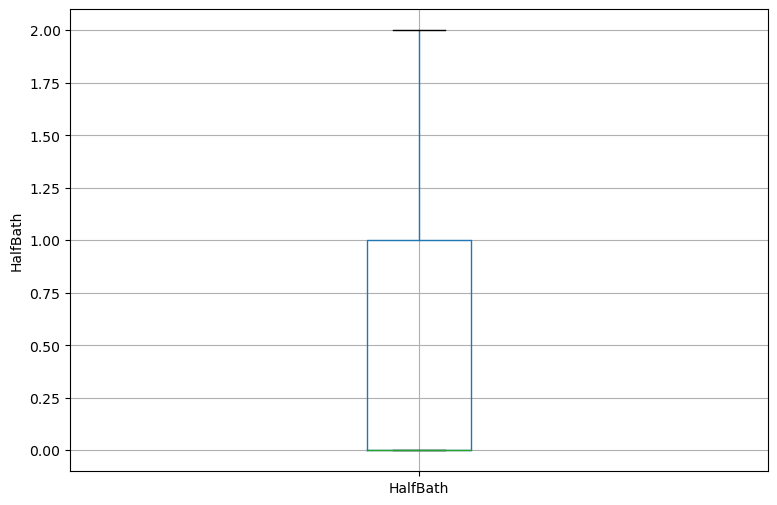

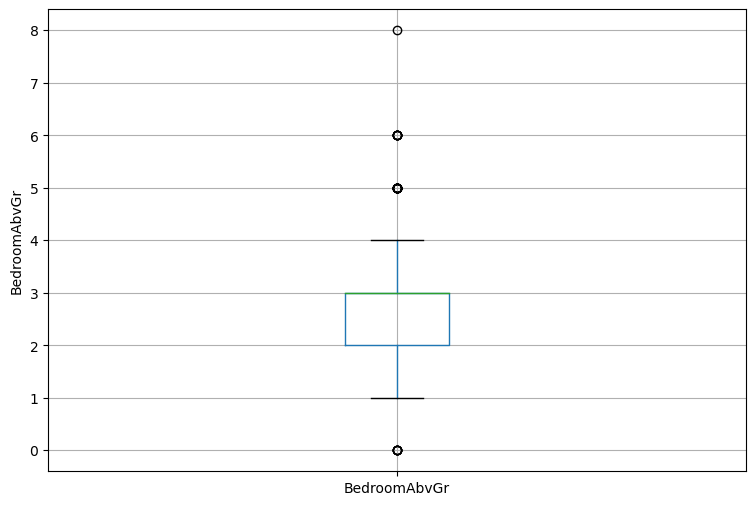

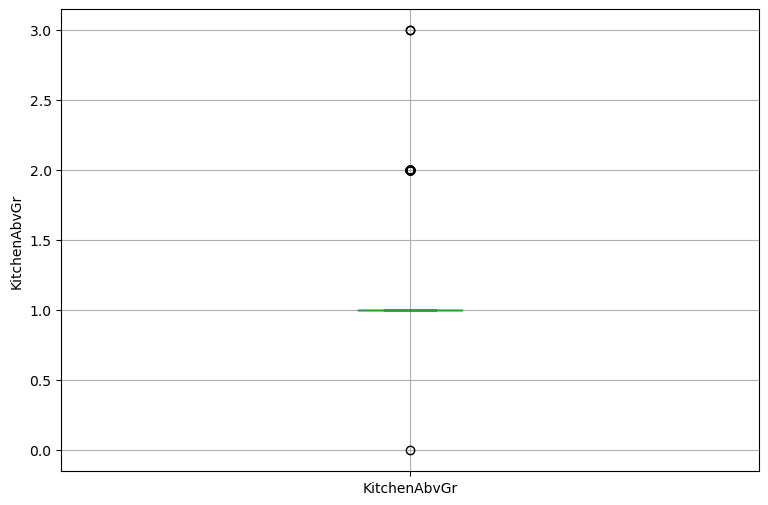

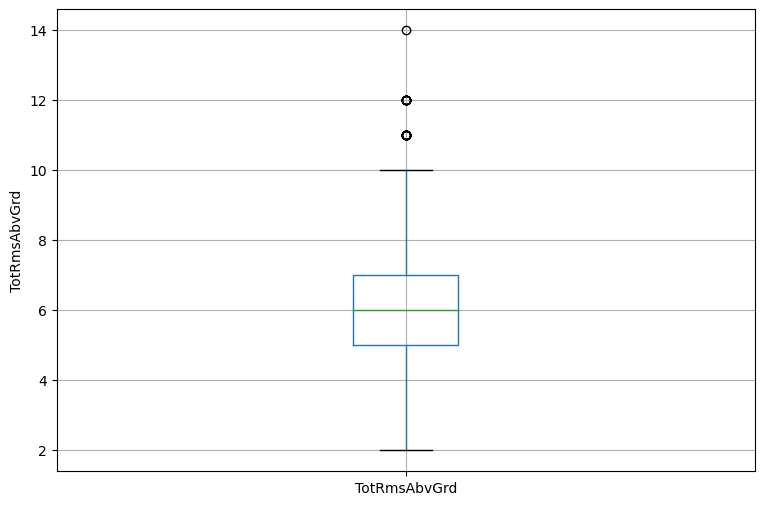

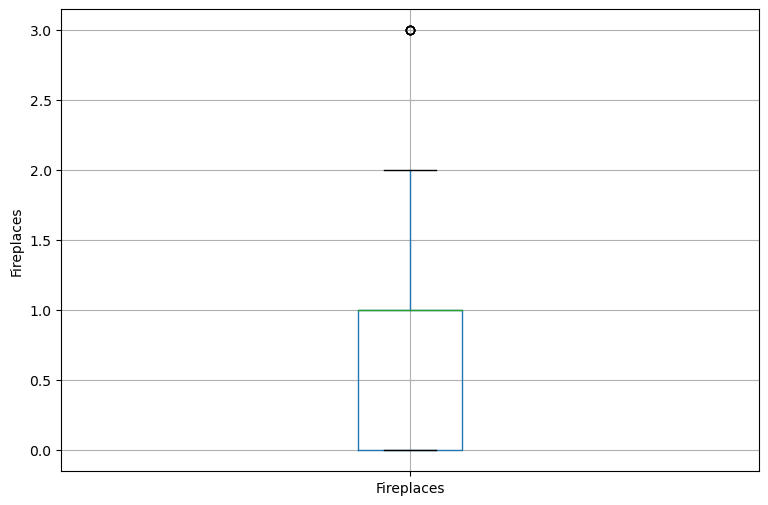

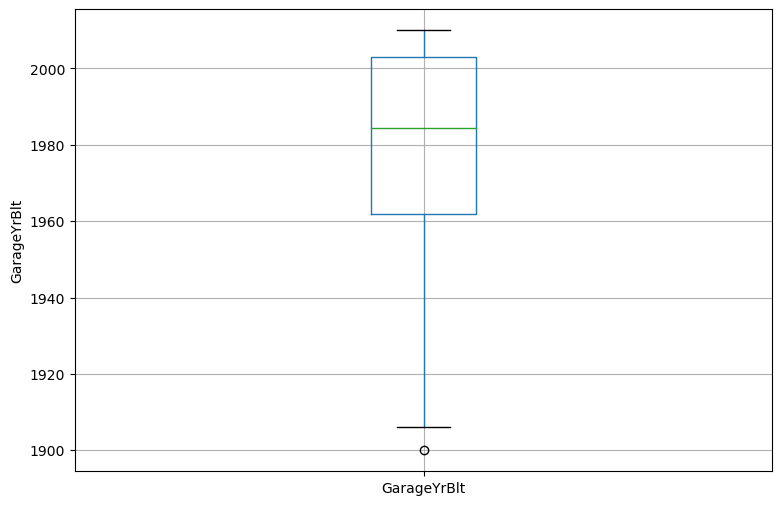

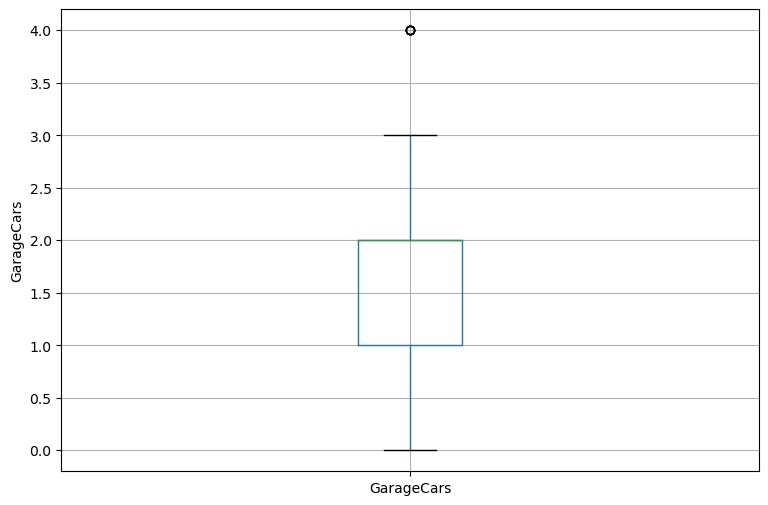

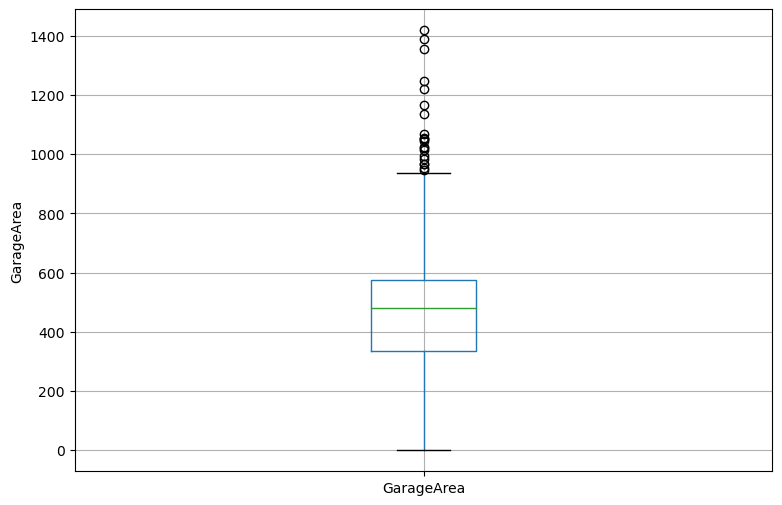

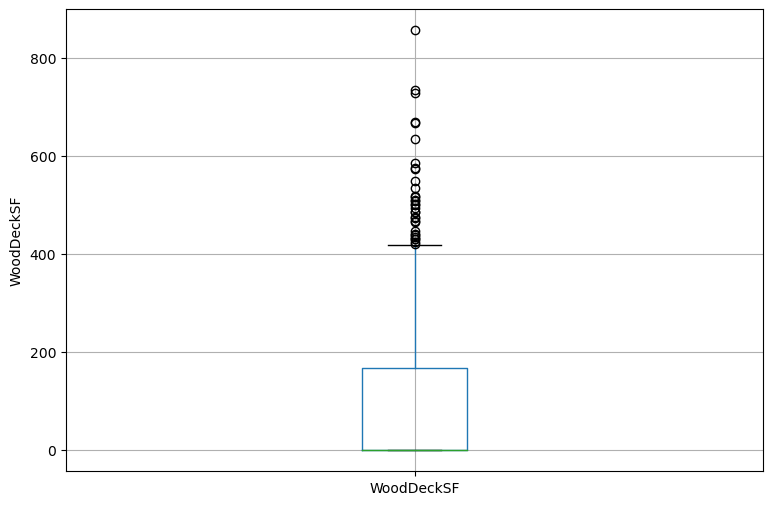

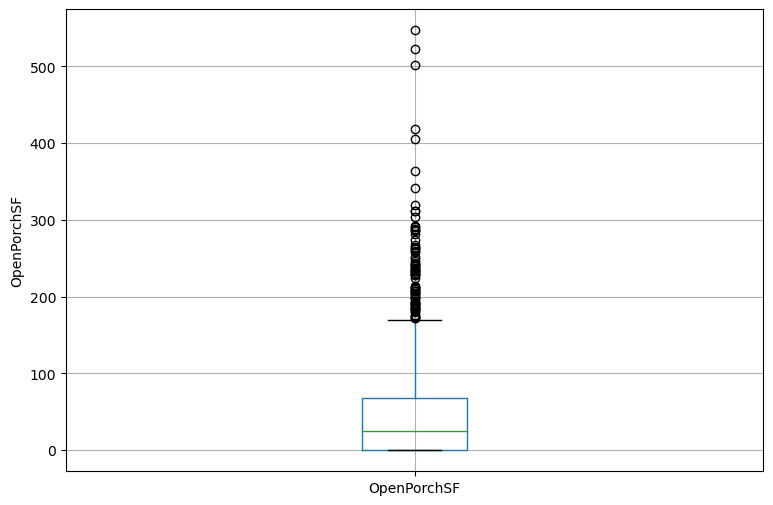

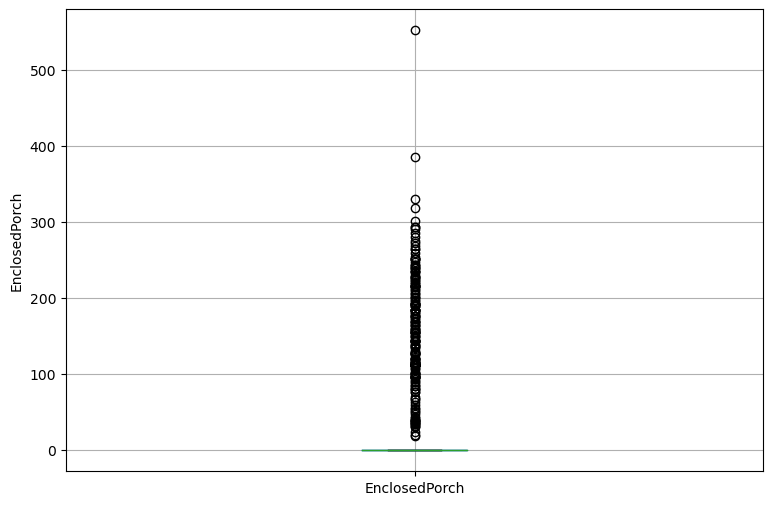

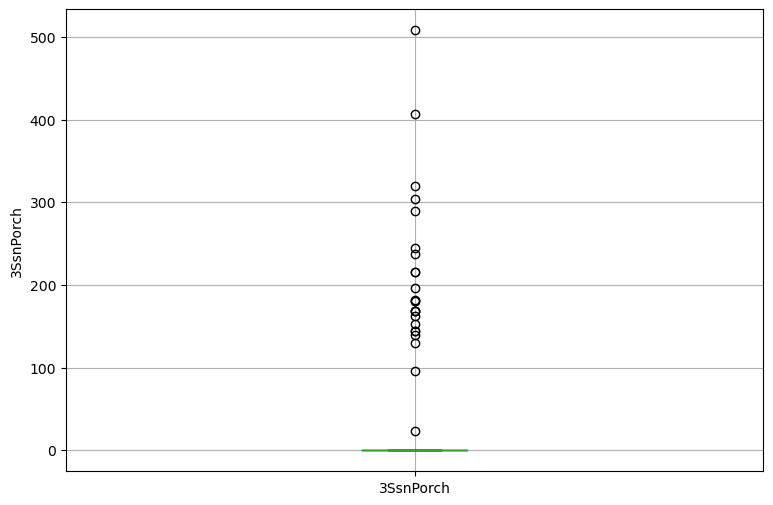

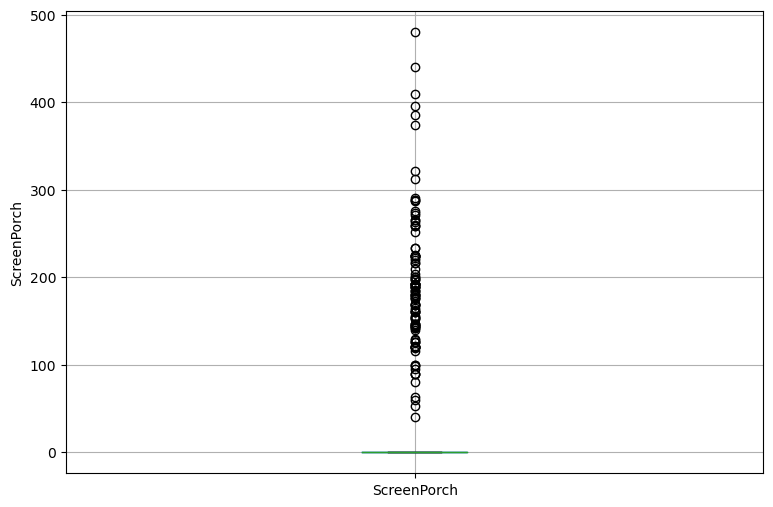

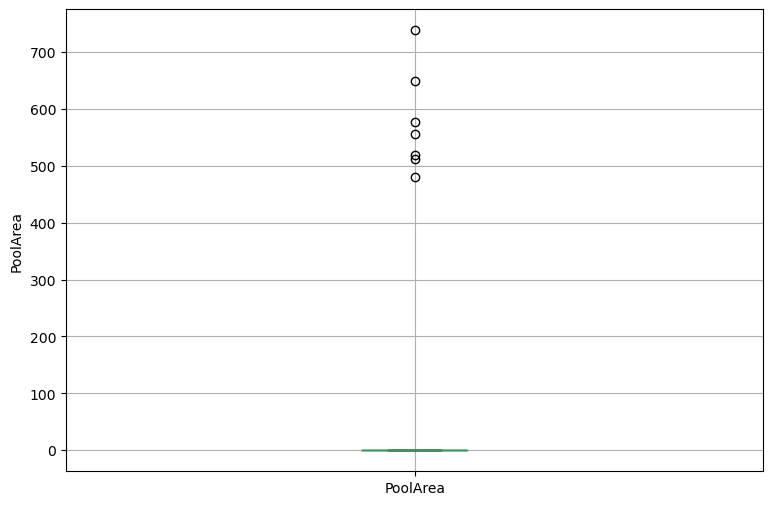

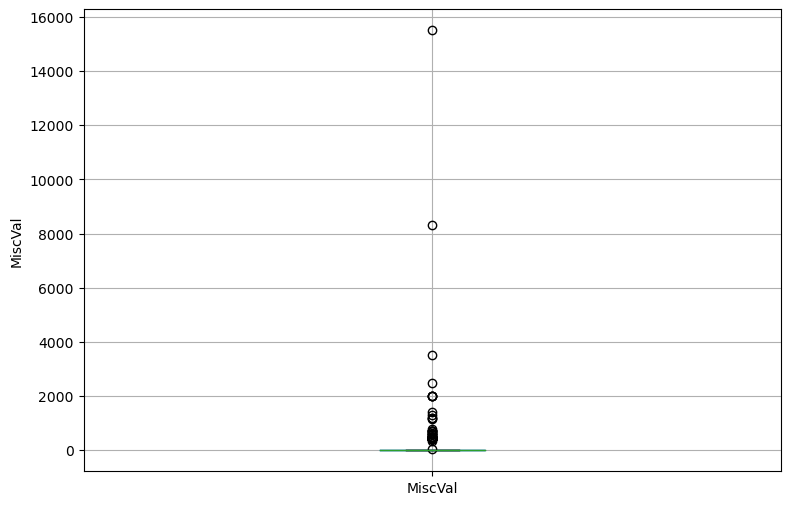

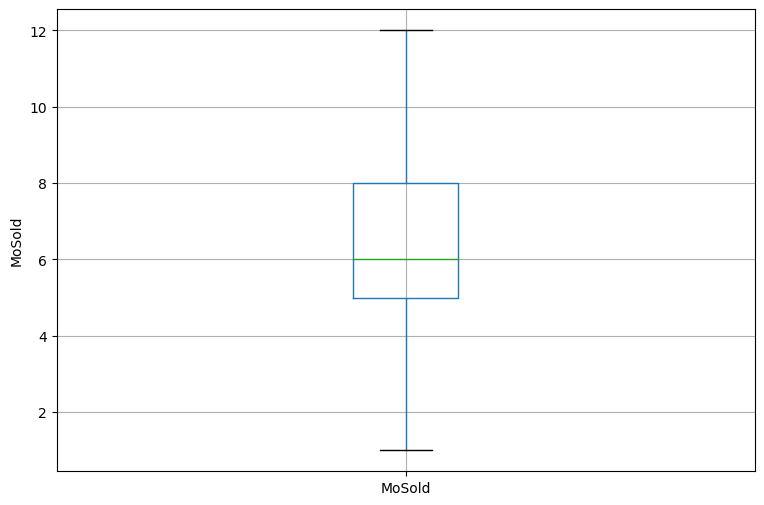

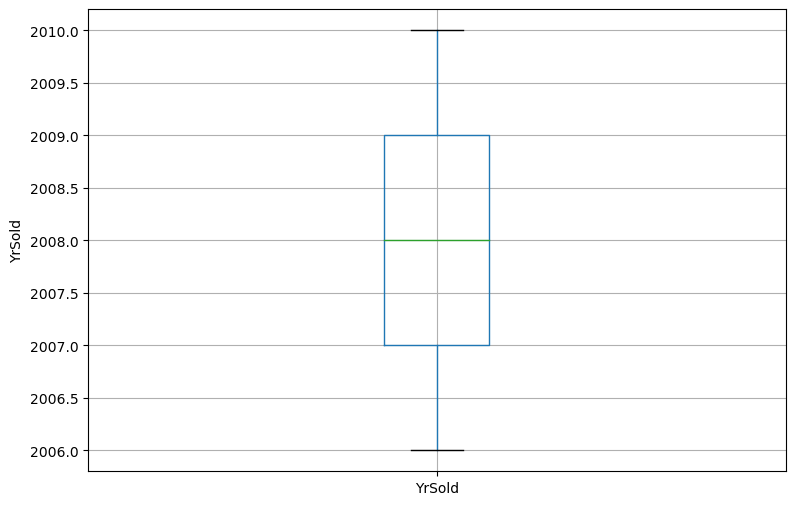

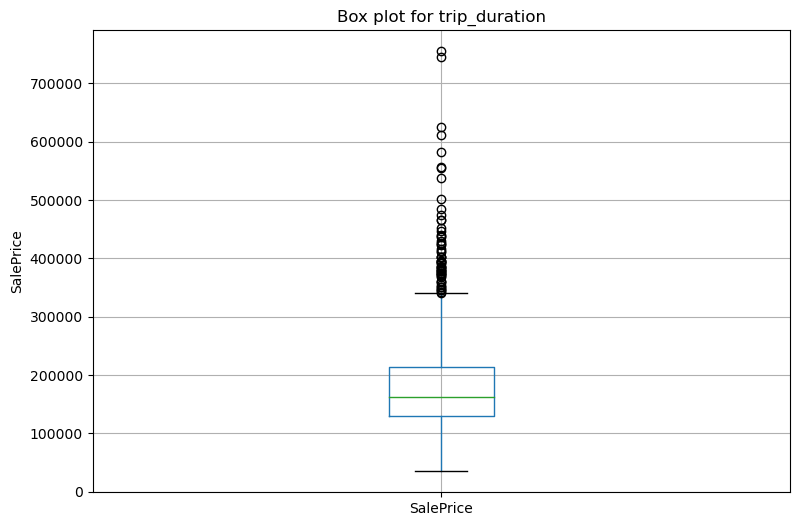

In [30]:
# plot a boxplot for the label by each numerical feature  
for col in train.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  train.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

## Detect outliers & Remove outliers

In [31]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe,columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

In [32]:
replace_with_thresholds(train, num_features)

# Corralation

In [33]:
# train_corr = train.select_dtypes(include=[np.number])
# corr = train_corr.corr()
# plt.subplots(figsize=(17,9))
# sns.heatmap(corr, annot=True)

In [34]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817680
GrLivArea        0.729311
GarageCars       0.675896
GarageArea       0.660029
TotalBsmtSF      0.645251
1stFlrSF         0.621873
FullBath         0.583994
YearBuilt        0.570327
YearRemodAdd     0.552061
TotRmsAbvGrd     0.539339
Fireplaces       0.488253
MasVnrArea       0.450751
LotArea          0.435876
GarageYrBlt      0.422186
OpenPorchSF      0.394637
BsmtFinSF1       0.387586
LotFrontage      0.363953
WoodDeckSF       0.343660
2ndFlrSF         0.316508
HalfBath         0.295110
BsmtFullBath     0.240345
BsmtUnfSF        0.216006
BedroomAbvGr     0.199360
MoSold           0.068075
Id              -0.027439
YrSold          -0.031358
MSSubClass      -0.061456
OverallCond     -0.105920
BsmtFinSF2            NaN
LowQualFinSF          NaN
BsmtHalfBath          NaN
KitchenAbvGr          NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
Name: SalePr

## Top 50% Corralation train attributes with sale-price

In [35]:
# Top 50% Corralation train attributes with sale-price

# important_num_cols = list(train.corr()["SalePrice"][(train.corr()["SalePrice"]>0.5)|(train.corr()["SalePrice"]<-0.5)].index)
# important_num_cols

In [36]:
train.describe(include=['int64'])

MSSubClass  OverallQual    YearBuilt  BsmtFinSF2  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000      1460.0  1460.000000   
mean     55.085616     6.100685  1971.299315         0.0  1050.254795   
std      37.508183     1.378430    30.108397         0.0   397.937878   
min      20.000000     2.000000  1885.000000         0.0    42.000000   
25%      20.000000     5.000000  1954.000000         0.0   795.750000   
50%      50.000000     6.000000  1973.000000         0.0   991.500000   
75%      70.000000     7.000000  2000.000000         0.0  1298.250000   
max     145.000000    10.000000  2010.000000         0.0  2052.000000   

          2ndFlrSF  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000        1460.0        1460.0        1460.0   1460.000000   
mean    346.789041           0.0           0.0           1.0      6.487671   
std     435.791621           0.0           0.0           0.0      1.541916   
min       0.000000           0.0           0.0           1.0      2.000000   
25%       0.000000           0.0           0.0           1.0      5.000000   
50%       0.000000           0.0           0.0           1.0      6.000000   
75%     728.000000           0.0           0.0           1.0      7.000000   
max    1820.000000           0.0           0.0           1.0     10.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       YrSold  
count    1460.0   1460.0  1460.000000  
mean        0.0      0.0  2007.815753  
std         0.0      0.0     1.328095  
min         0.0      0.0  2006.000000  
25%         0.0      0.0  2007.000000  
50%         0.0      0.0  2008.000000  
75%         0.0      0.0  2009.000000  
max         0.0      0.0  2010.000000

In [37]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
top_feature

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

In [38]:
col = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']

In [39]:
numcols = train[train.columns.intersection(top_feature)]
numcols.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003        2003.0          856     856.0     1710.0   
1            6       1976        1976.0         1262    1262.0     1262.0   
2            7       2001        2002.0          920     920.0     1786.0   
3            7       1915        1970.0          756     961.0     1717.0   
4            8       2000        2000.0         1145    1145.0     2198.0   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0       2.0             8         2.0       548.0   208500.0  
1       2.0             6         2.0       460.0   181500.0  
2       2.0             6         2.0       608.0   223500.0  
3       1.0             7         3.0       642.0   140000.0  
4       2.0             9         3.0       836.0   250000.0

<AxesSubplot:>

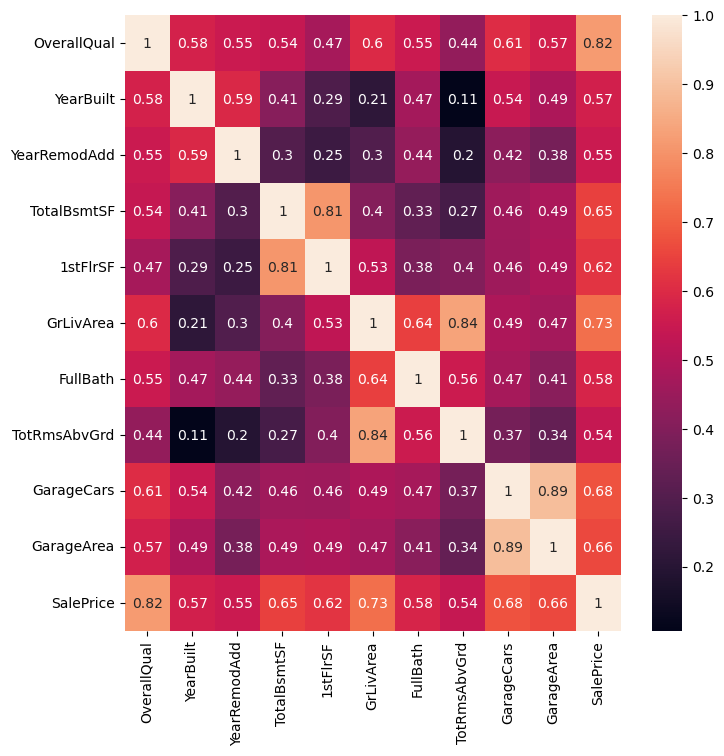

In [40]:
numcols = train[train.columns.intersection(top_feature)]
plt.figure(figsize=(8,8))
sns.heatmap(numcols.corr(), annot=True)

In [41]:
# top_feature = corr.index[abs(corr['SalePrice']>0.5)]
# plt.subplots(figsize=(9, 8))
# top_corr = train[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()

In [42]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=train.OverallQual, y=train.SalePrice)

# train.OverallQual.nunique()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


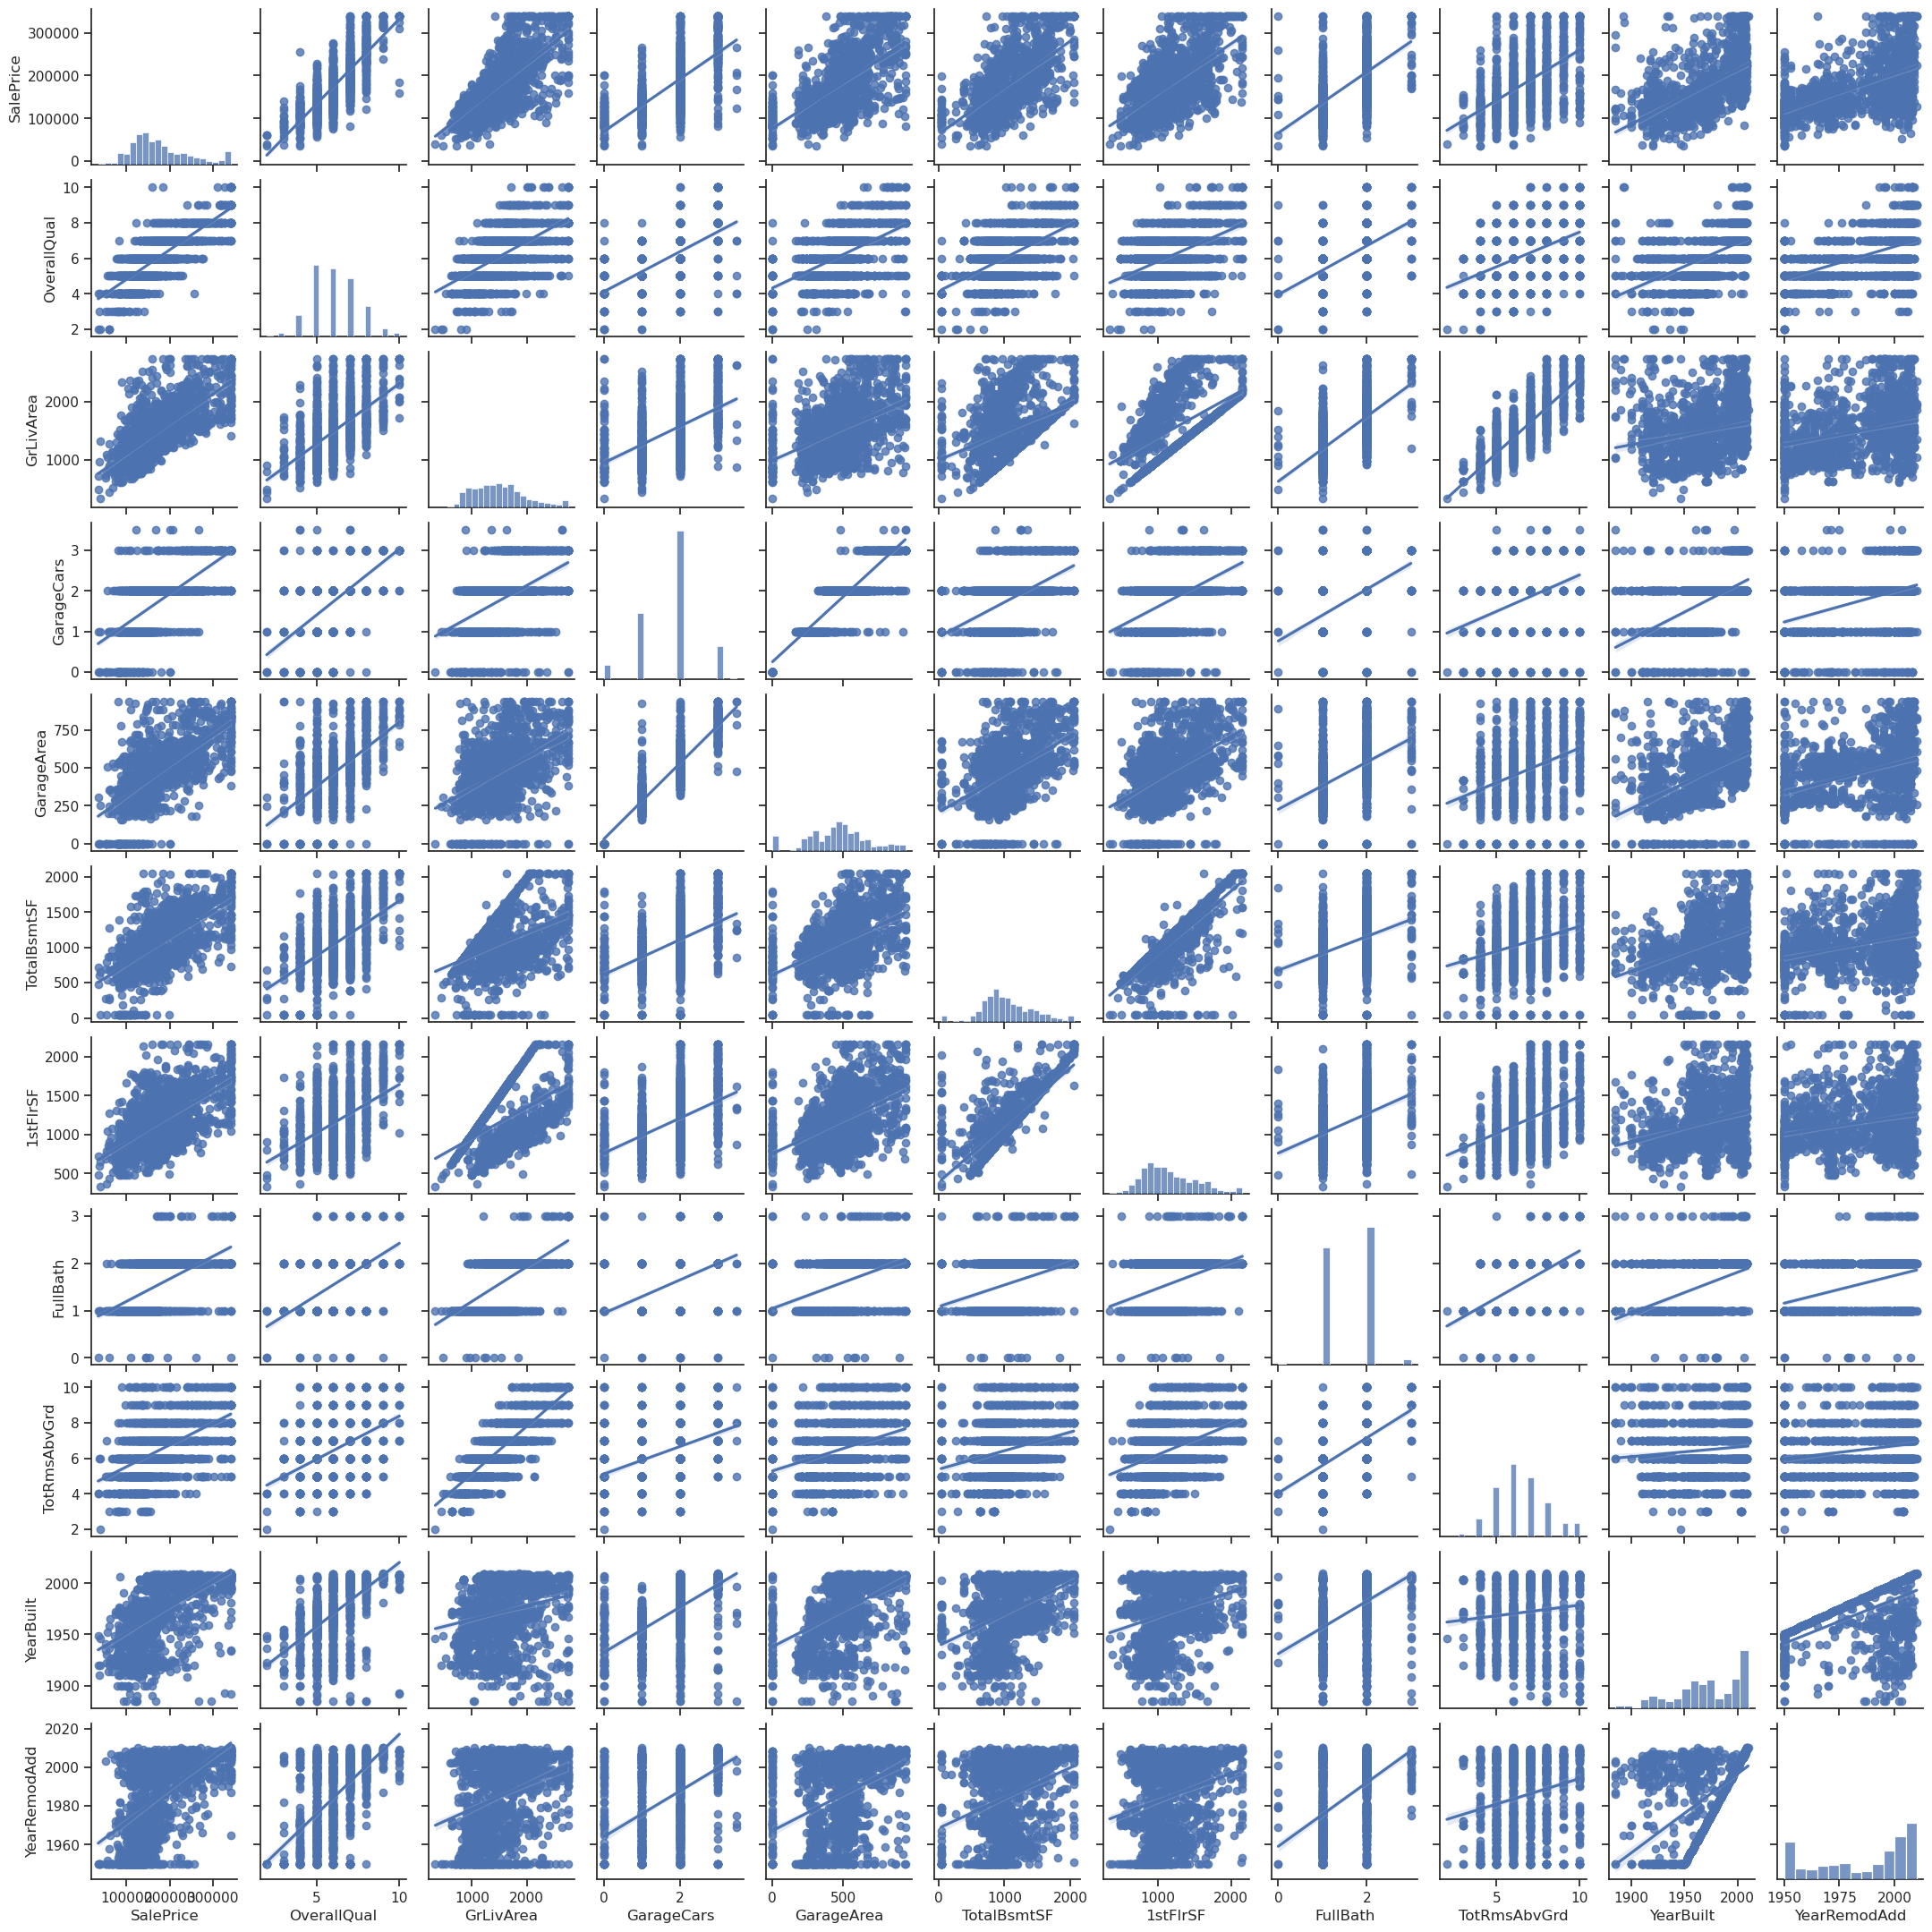

In [43]:
sns.set(style='ticks')
sns.pairplot(train[col], size=2, kind='reg')

In [44]:
train[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   float64
 3   GarageCars    1460 non-null   float64
 4   GarageArea    1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   float64
 7   FullBath      1460 non-null   float64
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 125.6 KB


In [45]:
train[col].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [46]:
# train = train[col].fillna(int(0))
# train.info()

In [47]:
# Isnull = miss_col_train.to_frame()
#Isnull.columns = ['count']
# Isnull.index.names = ['Name']
# Isnull['Name'] = Isnull.index

# plt.figure(figsize=(13, 5))
# sns.set(style='whitegrid')
# sns.barplot(x='Name', y='count', data=Isnull)
# plt.xticks(rotation = 90)
# plt.show()

In [48]:
print(train[col].duplicated().sum())

train[col].drop_duplicates(inplace=True)

0


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Split and Normalize Data

In [49]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)
    
    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Time Duration')
    
    return (MSE,RMSE,R2,Adjusted_R2) 

In [50]:
# important_num_cols = list(train.corr()["SalePrice"][(train.corr()["SalePrice"] > 0.5) | (train.corr()["SalePrice"]<-0.5)].index)

# numcols = train[train.columns.intersection(important_num_cols)]
# numcols.head()

In [51]:
num_features

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype='<U13')

In [52]:
num_features = pd.DataFrame(train, columns=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'])


In [53]:
X = num_features.drop('SalePrice', axis=1)
y = num_features['SalePrice']

In [54]:
X = pd.DataFrame(X)
X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0          60         65.0   8450.0            7          5.0       2003   
1  2.0          20         80.0   9600.0            6          7.5       1976   
2  3.0          60         68.0  11250.0            7          5.0       2001   
3  4.0          70         60.0   9550.0            7          5.0       1915   
4  5.0          60         84.0  14260.0            8          5.0       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0        2003.0       196.0       706.0  ...       548.0           0   
1        1976.0         0.0       978.0  ...       460.0         298   
2        2002.0       162.0       486.0  ...       608.0           0   
3        1970.0         0.0       216.0  ...       642.0           0   
4        2000.0       350.0       655.0  ...       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35              0          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0     2.0    2008  
1     5.0    2007  
2     9.0    2008  
3     2.0    2006  
4    12.0    2008  

[5 rows x 37 columns]

In [55]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 37)
(292, 37)
(1168,)
(292,)


# Regression models

## Linear Regression

In [58]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8731748782404891

In [59]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

#### Evaluation metrics for Train set

MSE : 560049512.3115 RMSE : 23665.365247794085
R2 : 0.8731748782404891 Adjusted R2 : 0.8690221972625228


(560049512.3115, 23665.365247794085, 0.8731748782404891, 0.8690221972625228)

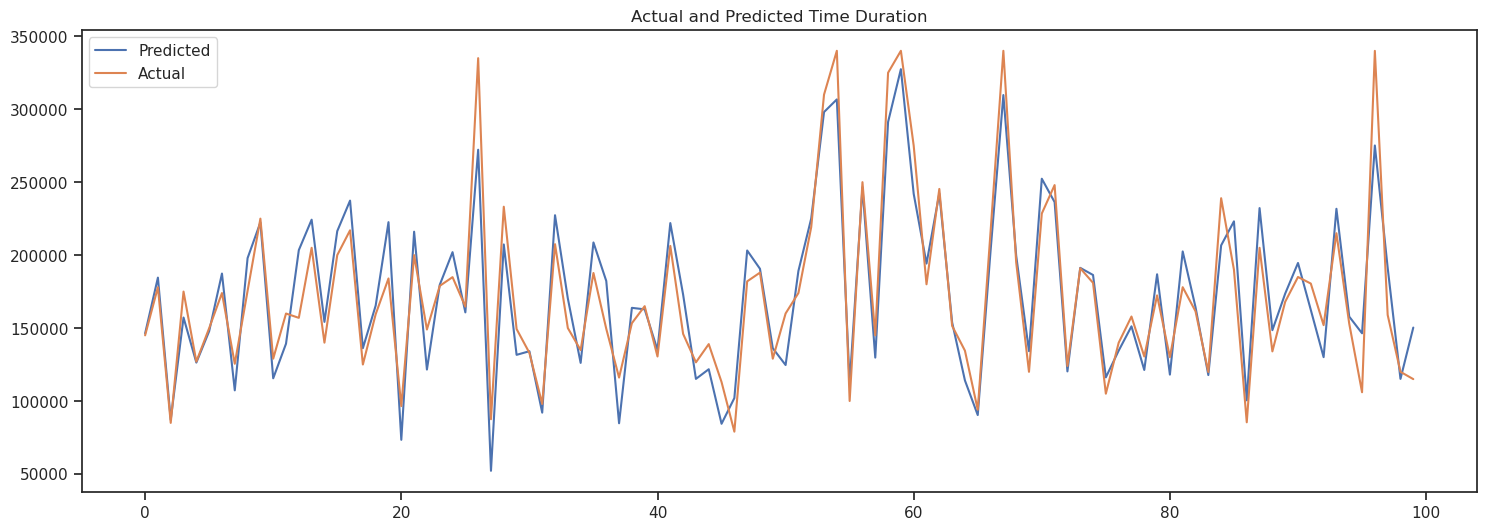

In [60]:
EvaluationMetric(X_train,y_train,y_pred_train)

#### Evaluation metrics for Test set

MSE : 485919585.6375 RMSE : 22043.58377481983
R2 : 0.9006146978116948 Adjusted R2 : 0.8861373112724534


(485919585.6375, 22043.58377481983, 0.9006146978116948, 0.8861373112724534)

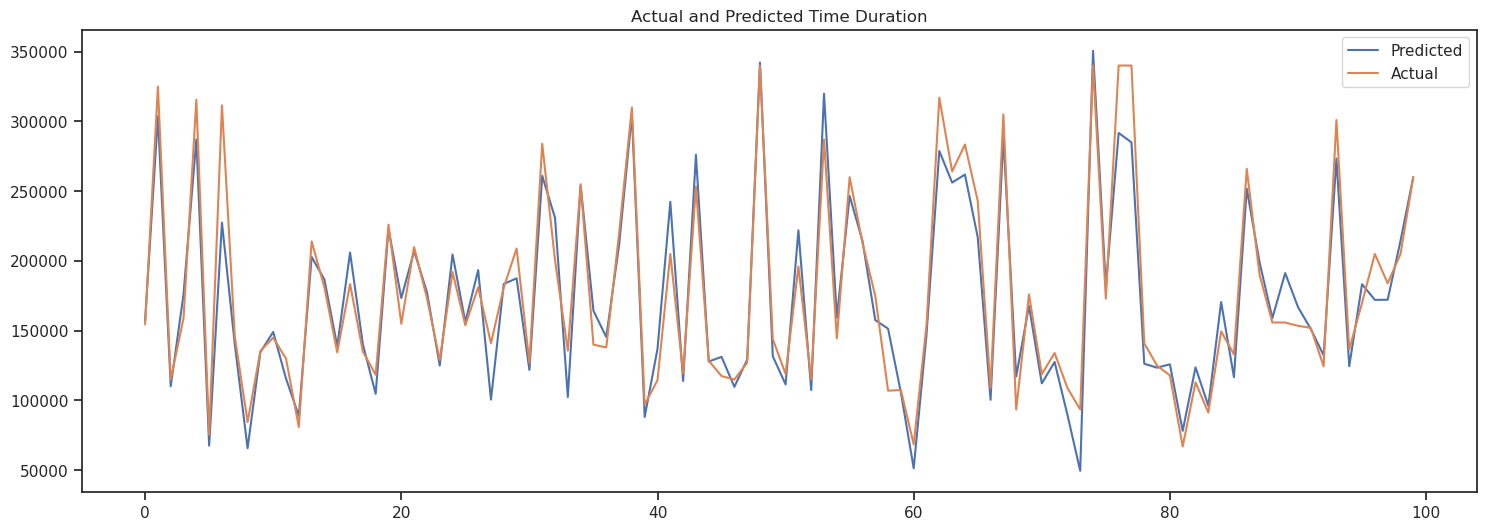

In [61]:
EvaluationMetric(X_test,y_test,y_pred_test)

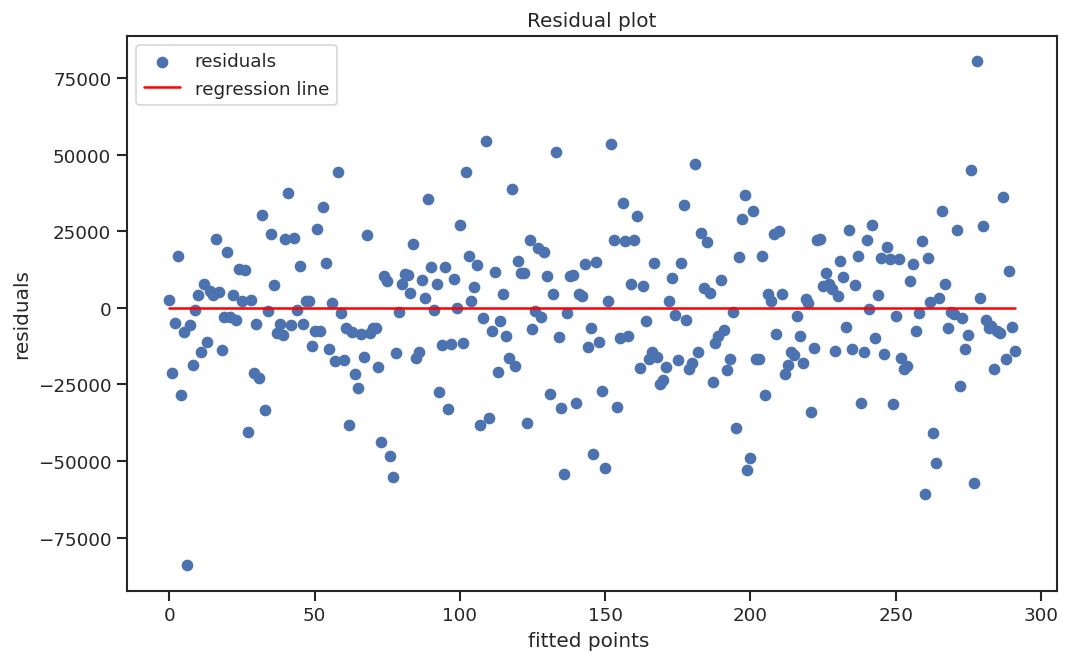

In [62]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

## LightGBM

In [63]:
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]

params={"n_estimator":n_estimator,
        "max_depth":max_depth,
        "min_samples_split":min_samples_split}

lgb = LGBMRegressor()
gs_lgb = GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; tot

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimator': [5, 10, 20]},
             scoring='r2', verbose=2)

In [64]:
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

0.8813637663231167
{'max_depth': 5, 'min_samples_split': 40, 'n_estimator': 5}


In [65]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [66]:
y_preds_lgb_test = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train = gs_lgb_opt_model.predict(X_train)

MSE : 134012221.3409 RMSE : 11576.364772280633
R2 : 0.9696524755129797 Adjusted R2 : 0.9686587955076525


(134012221.3409, 11576.364772280633, 0.9696524755129797, 0.9686587955076525)

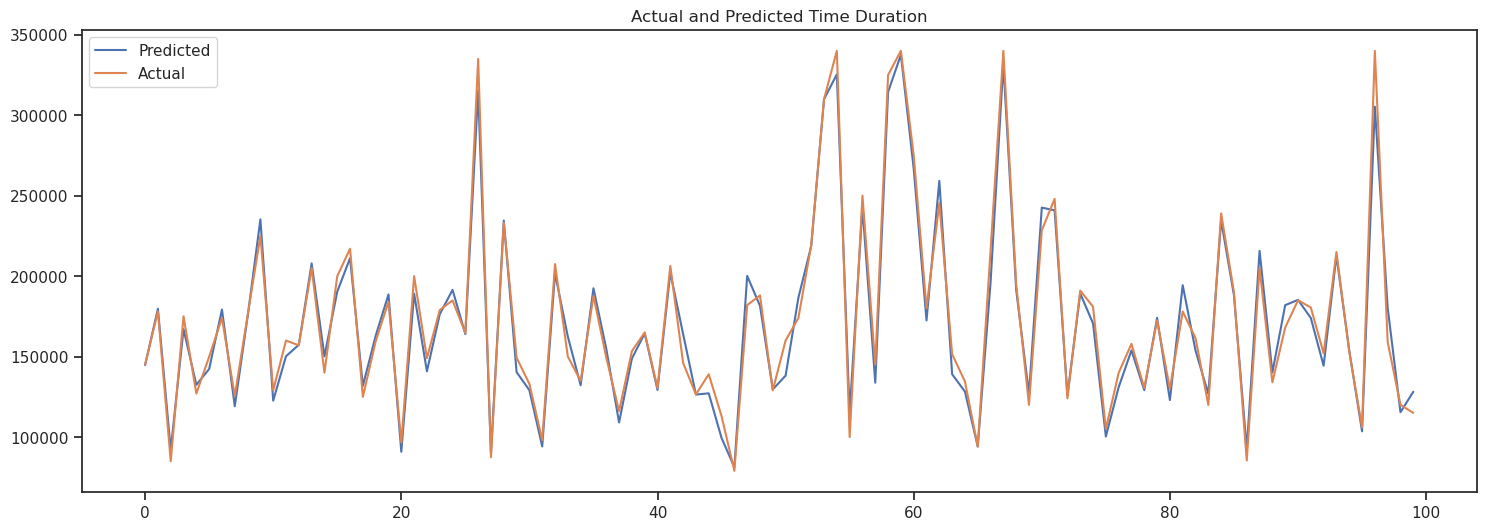

In [67]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 399311913.4402 RMSE : 19982.790431774036
R2 : 0.9183285951880591 Adjusted R2 : 0.9064315795264771


(399311913.4402, 19982.790431774036, 0.9183285951880591, 0.9064315795264771)

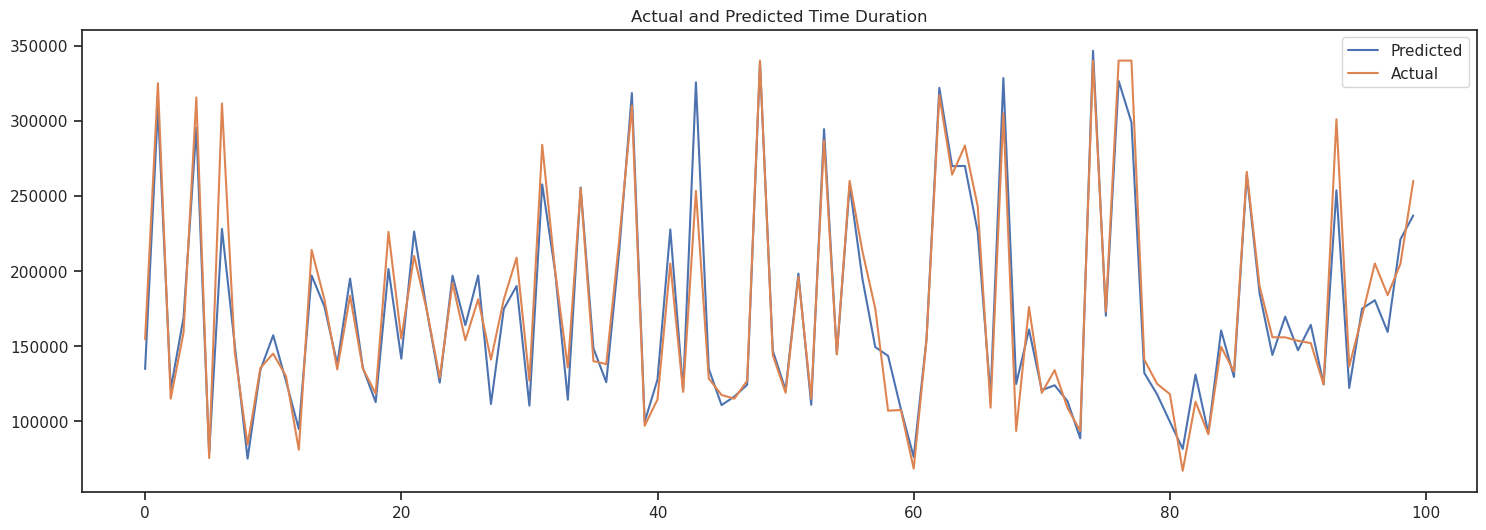

In [68]:
EvaluationMetric(X_test, y_test, y_preds_lgb_test)

In [69]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
16      GrLivArea                 153
3         LotArea                 132
6       YearBuilt                  93
12    TotalBsmtSF                  93
13       1stFlrSF                  88
9      BsmtFinSF1                  87
27     GarageArea                  81
5     OverallCond                  67
0              Id                  62
4     OverallQual                  62
7    YearRemodAdd                  53
28     WoodDeckSF                  42
14       2ndFlrSF                  41
25    GarageYrBlt                  41
29    OpenPorchSF                  38
24     Fireplaces                  33
11      BsmtUnfSF                  31
2     LotFrontage                  31
8      MasVnrArea                  28
35         MoSold                  26
26     GarageCars                  19
36         YrSold                  18
17   BsmtFullBath                  15
1      MSSubClass                  13
23   TotRmsAbvGrd                   7
21   BedroomAbvGr                   7
20       HalfBath                   3
19       FullBath                   2
22   KitchenAbvGr                   0
15   LowQualFinSF                   0
30  EnclosedPorch                   0
31      3SsnPorch                   0
32    ScreenPorch                   0
33       PoolArea                   0
34        MiscVal                   0
10     BsmtFinSF2                   0
18   BsmtHalfBath                   0

<AxesSubplot:title={'center':'Top 10 Features'}, xlabel='Feature', ylabel='Feature Importance'>

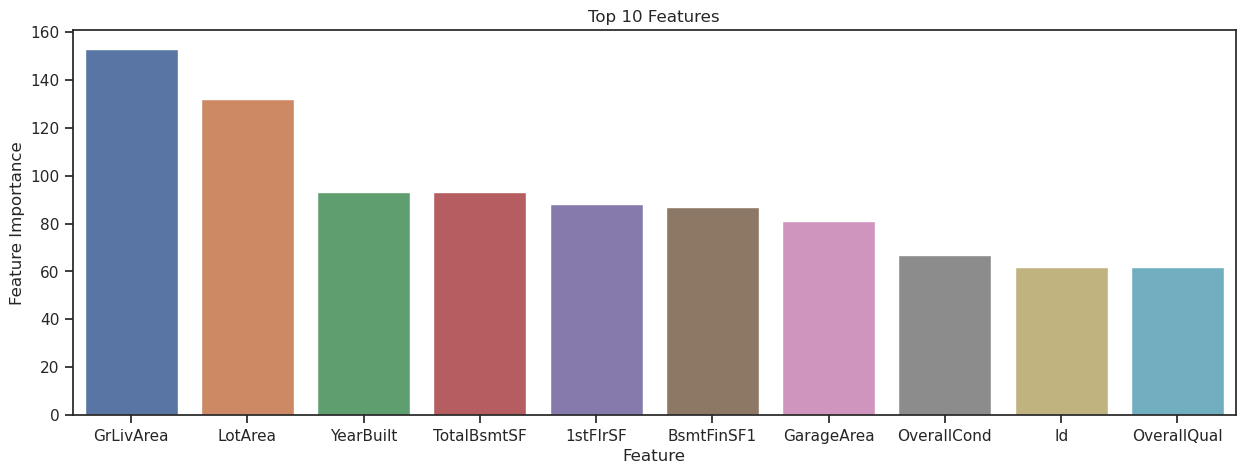

In [70]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


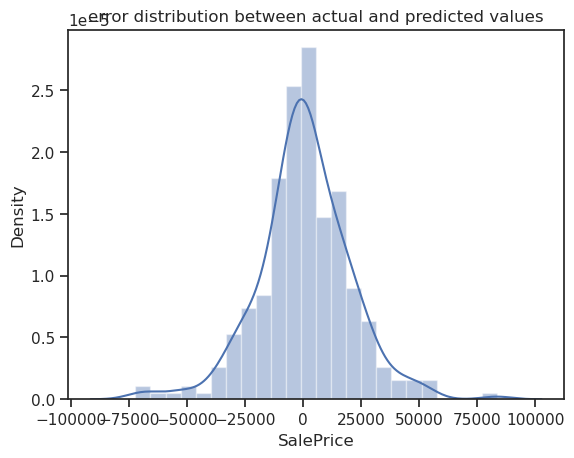

In [71]:
sns.distplot(y_test - y_preds_lgb_test ).set_title("error distribution between actual and predicted values")
plt.show()

## Random Forest 

In [72]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [73]:
y_pred = rf_reg.predict(X_test)
r2_score(y_pred,y_test)

0.8905524930286672

In [74]:
n_estimators = [90,100]
max_depth = (1,7,1)
min_samples_leaf = (1,7,1)
min_samples_split = (1,7,1)
max_features = ['auto','log2']

param = {
    "n_estimators" : n_estimators,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features' : max_features
}
rf_grid = GridSearchCV(rf_reg,param)
rf_grid.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/p

GridSearchCV(estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': (1, 7, 1),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': (1, 7, 1),
                         'min_samples_split': (1, 7, 1),
                         'n_estimators': [90, 100]})

In [75]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.8646084601004078
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}


In [76]:
gs_rf_opt_model = rf_grid.best_estimator_

In [77]:
y_preds_rf_test = gs_lgb_opt_model.predict(X_test)
y_pred_rf_train = gs_lgb_opt_model.predict(X_train)

MSE : 134012221.3409 RMSE : 11576.364772280633
R2 : 0.9696524755129797 Adjusted R2 : 0.9686587955076525


(134012221.3409, 11576.364772280633, 0.9696524755129797, 0.9686587955076525)

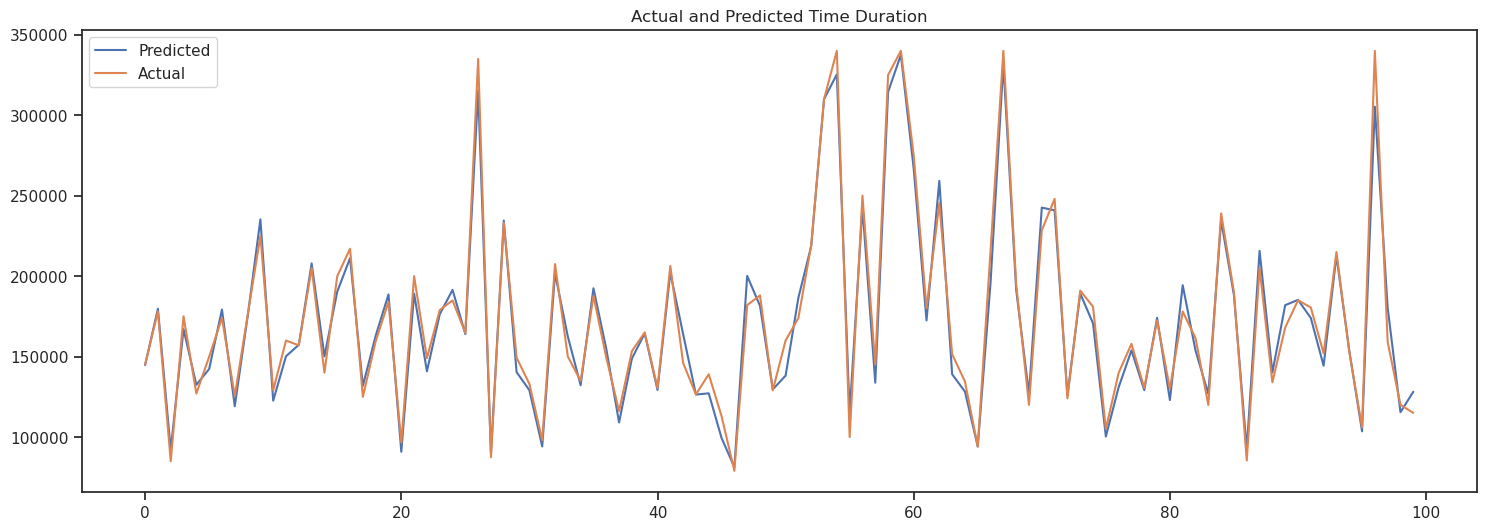

In [78]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_rf_train)

MSE : 399311913.4402 RMSE : 19982.790431774036
R2 : 0.9183285951880591 Adjusted R2 : 0.9064315795264771


(399311913.4402, 19982.790431774036, 0.9183285951880591, 0.9064315795264771)

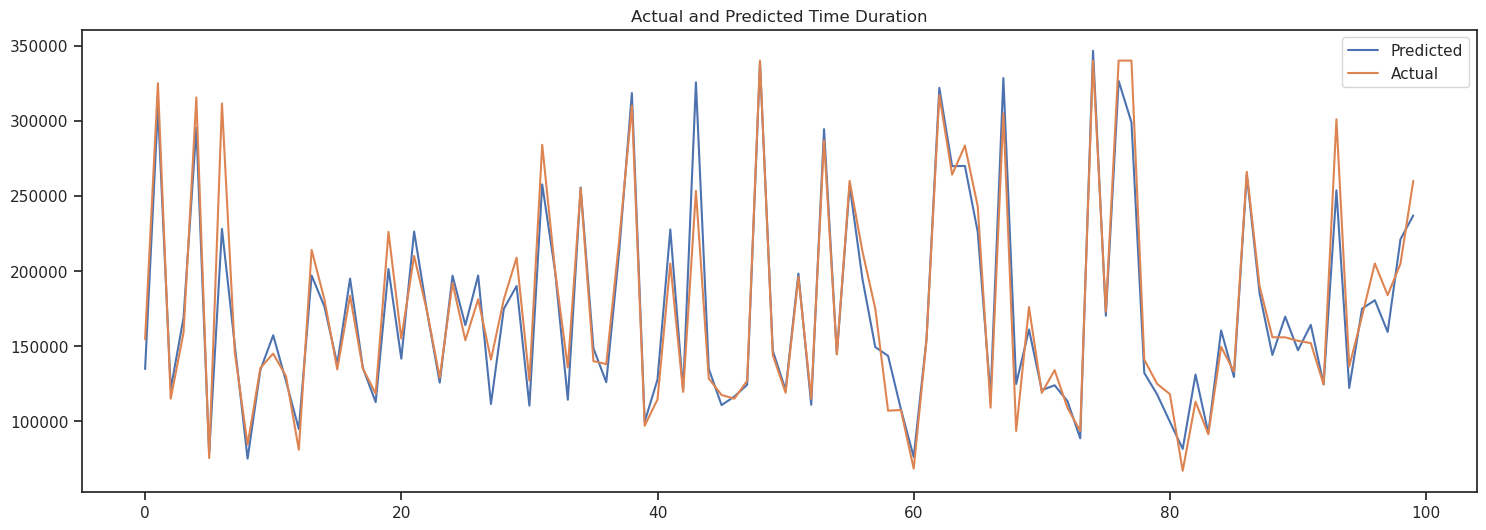

In [79]:
#Evaluation metrics for Test set
EvaluationMetric(X_test, y_test, y_preds_rf_test)

In [80]:
importances = gs_rf_opt_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
4     OverallQual            0.630836
16      GrLivArea            0.127394
12    TotalBsmtSF            0.041772
9      BsmtFinSF1            0.030486
27     GarageArea            0.027155
26     GarageCars            0.025481
13       1stFlrSF            0.020355
6       YearBuilt            0.017321
3         LotArea            0.016294
7    YearRemodAdd            0.008862
5     OverallCond            0.006979
14       2ndFlrSF            0.005253
24     Fireplaces            0.005241
29    OpenPorchSF            0.004233
2     LotFrontage            0.003794
1      MSSubClass            0.003735
11      BsmtUnfSF            0.003689
25    GarageYrBlt            0.003647
28     WoodDeckSF            0.002901
35         MoSold            0.002772
0              Id            0.002717
8      MasVnrArea            0.002545
17   BsmtFullBath            0.001567
23   TotRmsAbvGrd            0.001531
21   BedroomAbvGr            0.001054
19       FullBath            0.000918
20       HalfBath            0.000742
36         YrSold            0.000724
22   KitchenAbvGr            0.000000
15   LowQualFinSF            0.000000
30  EnclosedPorch            0.000000
31      3SsnPorch            0.000000
32    ScreenPorch            0.000000
33       PoolArea            0.000000
34        MiscVal            0.000000
10     BsmtFinSF2            0.000000
18   BsmtHalfBath            0.000000

<AxesSubplot:title={'center':'Top 10 Features'}, xlabel='Feature', ylabel='Feature Importance'>

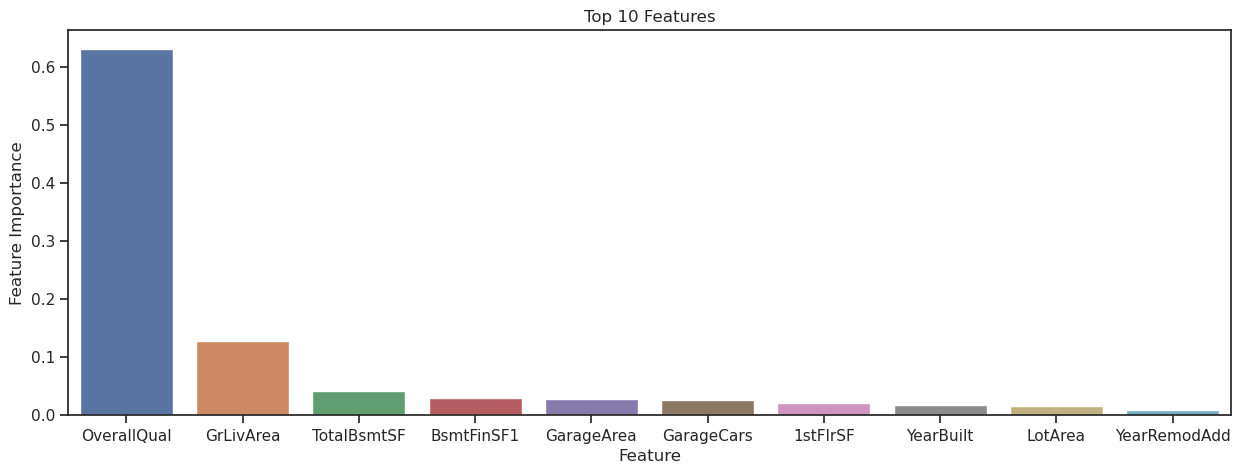

In [81]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


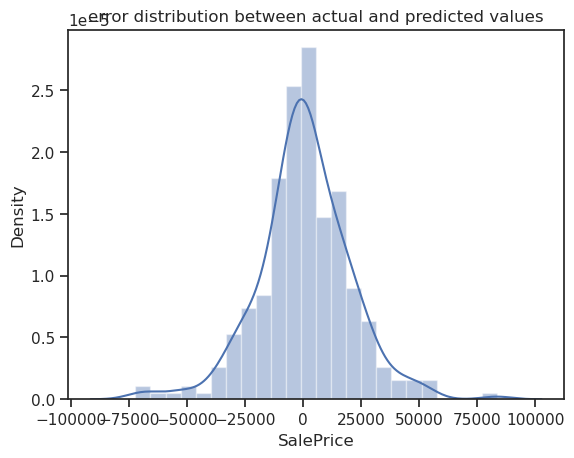

In [82]:
sns.distplot(y_test - y_preds_rf_test).set_title("error distribution between actual and predicted values")
plt.show()

### Random Forest Model Performance
Score: The model has a score of 0.8646, which means it correctly predicts house prices about 86% of the time. This score indicates that the model is reasonably accurate.
Model Evaluation
We used two sets of data to evaluate the model: a training set and a test set. The training set is the data used to build the model, while the test set is separate data used to see how well the model predicts new, unseen data.

#### Training Set Evaluation
MSE (Mean Squared Error): This is a measure of how close the model's predictions are to the actual house prices. The lower the MSE, the better the model. Our model has an MSE of 134,012,221,34, which is a good value considering the range of house prices.

RMSE (Root Mean Squared Error): This is the square root of the MSE and gives a better sense of the average difference between the predicted and actual house prices. The model's RMSE is 11576.364,77, meaning that, on average, the predictions are off by about $11,576.

R2 (R-squared): This is a measure of how well the model's predictions fit the actual data. A higher R2 indicates a better fit. Our model has an R2 of 0.9696, or 96.96%. This means that 96.96% of the variation in house prices can be explained by our model.

Adjusted R2: This is a modified version of R2 that takes into account the number of features used in the model. Our model's adjusted R2 is 0.9686, or 96.86%.

#### Test Set Evaluation
MSE (Mean Squared Error): The model's MSE for the test set is 399,311,913.44, which is higher than the training set but still within an acceptable range.

RMSE (Root Mean Squared Error): The model's RMSE for the test set is 199,89.79, which is higher than the training set but still a reasonable average difference between predicted and actual house prices.

R2 (R-squared): The model's R2 for the test set is 0.9183, or 91.83%. This means that 89.09% of the variation in house prices can be explained by our model when applied to new, unseen data.

Adjusted R2: The model's adjusted R2 for the test set is 0.9064, or 90.64%.

#### Key Takeaways
The model we have built to predict house prices performs reasonably well, with an overall accuracy of around 84%. It is able to explain about 89% of the variation in house prices for new, unseen data. On average, the model's predictions are off by about $11,576 to $19,989, depending on the data set. While there is still room for improvement, this model can be a helpful tool in estimating house prices.

# test data and Submission

In [83]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [84]:
imputer = SimpleImputer(strategy='most_frequent') 
imputer.fit(test)
test.loc[:,:] = imputer.fit_transform(test) 

test = pd.DataFrame(test)

In [85]:
cat_features_test = np.array([i for i in test.columns.tolist() if test[i].dtype == 'object'])
num_features_test = np.array([i for i in test.columns.tolist() if test[i].dtype != 'object'])

In [86]:
replace_with_thresholds(test, num_features_test)

In [87]:
num_features_test

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype='<U13')

In [88]:
test = test[num_features_test]

In [89]:
y_pred = rf_reg.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [90]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
submission.to_csv('submission.csv', index=False)

In [91]:
# X_test  = test.select_dtypes(include=['number']).copy()
# X_cols = num_features.copy()
# X_test = test[X_cols[1:]]
# X_test.info()

In [92]:
# predictions = final_model.predict(X_test)

In [93]:
# solution = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
# y_pred = solution["SalePrice"]

# from sklearn.metrics import mean_squared_log_error
# RMSLE = np.sqrt( mean_squared_log_error(y_pred) )
# print("The score is %.5f" % RMSLE )